<a href="https://colab.research.google.com/github/albavu97/MOOC_BIOINFORMATICA_UGR/blob/main/M%C3%B3dulo_2_C%C3%A1psulas_1%2C_2_y_3_abiertaUGR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



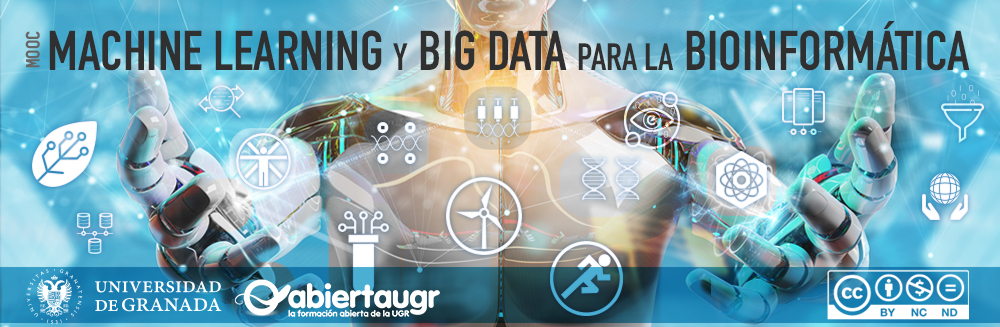



# **Machine Learning y Big Data para la Bioinformática.**
## **Módulo 2 - Análisis bioinformático sobre un problema en Ómicas**

### Breves instrucciones



**Introducción a NoteBook**

Dentro de este cuaderno (*NoteBook*), se le guiará paso a paso desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido.

El cuaderno de *Jupyter* (Python y R) es un enfoque que combina bloques de texto (como éste) junto con bloques o celdas de código. La gran ventaja de este tipo de celdas, es su interactividad, ya que pueden ser ejecutadas para comprobar los resultados directamente sobre las mismas. *Muy importante*: el orden las instrucciones es fundamental, por lo que cada celda de este cuaderno debe ser ejecutada secuencialmente. En caso de omitir alguna, puede que el programa lance un error, así que se deberá comenzar desde el principio en caso de duda.

Antes de nada:

Es muy muy importante que al comienzo se seleccione "*Abrir en modo de ensayo*" (draft mode), arriba a la izquierda. En caso contrario, no permitirá ejecutar ningún bloque de código, por cuestiones de seguridad. Cuando se ejecute el primero de los bloques, aparecerá el siguiente mensaje: "*Advertencia: Este cuaderno no lo ha creado Google.*". No se preocupe, deberá confiar en el contenido del cuaderno (*NoteBook*) y pulsar en "Ejecutar de todos modos".

¡Ánimo!

Haga clic en el botón "play" en la parte izquierda de cada celda de código. Las líneas que comienzan con un hashtag (#) son comentarios y no afectan a la ejecución del programa.

También puede pinchar sobre cada celda y hacer "*ctrl+enter*" (*cmd+enter* en Mac).

Cada vez que ejecute un bloque, verá la salida justo debajo del mismo. La información suele ser siempre la relativa a la última instrucción, junto con todos los `print()` (orden para imprimir) que haya en el código.


---

***Nota importante*: este Notebook contiene algunas celdas de código que instalan bibliotecas y funciones necesarias para ejecutar los códigos de las Cápsulas 1, 2, y 3. Estas celdas de instalación tomarán varios minutos para completar su ejecución (se indica las que requieren más tiempo).** 

**En cualquier caso, disponéis de los resultados ya ejecutados para todas las celdas de código, así que os recomendamos que continuéis la lectura del Notebook mientras se completa la instalación.**

**Si vuestra sesión expira, lo que ocurre si cerráis el navegador o tras cierto tiempo de inactividad, tendréis que volver a instalar las bibliotecas necesarias, lo que volverá a requerir cierto tiempo. Por ello, os recomendamos que ejecutéis en la misma sesión los códigos de las tres cápsulas y que utilicéis los resultados precalculados que se muestran si queréis avanzar más rápido** 


---

# Cápsula 1 - El problema - ¿Cómo obtener y preparar los datos?


**Autores**: 

*Por* **Carlos Cano Gutiérrez**

Profesor Titular de la Universidad de Granada.   
Departamento de Ciencias de Computación e Inteligencia Artificial.

*Por* **Pedro Carmona Sáez**   

Profesor Ayundante Doctor de la Universidad de Granada.    
Departamento de Estadística e Investigación Operativa.






## **ÍNDICE**

En este *notebook*: 
1. Se establece la nomenclatura respecto a los conjuntos de datos que se utilizará durante el resto del curso. 
2. Se describe un problema con datos -ómicos que se empleará para ilustrar distintos análisis durante el resto del curso.
3. Aprendemos a descargar de forma automática datos del proyecto TCGA (The Cancer Genome Atlas). 
4. Aprendemos a reconocer cómo están organizados los datos de TCGA.
5. Aprendemos a utilizar algunas funciones útiles del lenguaje de programación R. 

Contenidos: 
1. [Nomeclatura de interés para describir un problema](#nomenclatura)
2. [Descripción de un problema en -ómicas](#problema)
3. [Lenguajes de programación elegidos: R y Python](#set-up)
4. [Descarga de datos de TCGA](#download)
5. [Estructura de los datos de TCGA](#data)






## **1. NOMENCLATURA DE INTERÉS PARA DESCRIBIR UN PROBLEMA**

Los protagonistas de este curso son los datos y las técnicas de análisis de datos. Es por esto que antes de empezar a manipular datos, necesitamos acordar la nomenclatura con la que nos referiremos a ciertos términos y conceptos frecuentes en el ámbito. 

Cuando pensamos en grandes volúmenes de datos, típicamente se nos viene a la mente una representación de datos en forma de tabla, con un gran número de filas y columnas. Sin embargo, rara vez los datos son producidos directamente en una única tabla, ya *limpia* y preparada para su análisis. Por el contrario, típicamente los datos son producidos en distintos formatos (texto, imágenes, audio, video, varias tablas con información complementaria entre sí, etc.), son heterogéneos,  están incompletos y tienen ruido.  

Las técnicas de *Machine Learning* que os vamos a enseñar en el curso no aprenden directamente a partir de los datos *crudos* (denominamos un dato *crudo* como un dato que no ha sido manipulado o procesado, sino que está en su formato y escala original). Por ejemplo, los datos *crudos* son las imágenes capturadas por un escáner de tomografía computerizada (TAC) o los textos de la historia clínica de un paciente. Para analizar este tipo de datos es necesario primero convertirlos a un formato apropiado para manipularlos. Como se indicará en la siguiente cápsula, el proceso de conversión, preparación o manipulación de datos que permite su análisis posterior por técnicas computacionales se denomina *preprocesamiento*.  
 
Definimos un **conjunto de datos** como una colección de objetos, puntos, registros, patrones, eventos, casos, muestras, observaciones, o instancias. Para unificar la nomenclatura a lo largo del curso, utilizaremos este último término, **instancia** para referirnos a cada uno de estos objetos. Por ejemplo, una instancia podría ser un paciente en un estudio clínico. 

Las instancias pueden representarse como un conjunto de características, propiedades o variables que las describen. Utilizaremos este último término, **variable**, para unificar la nomenclatura a lo largo del curso. Por tanto, definimos una variable como una medida individual que caracteriza una propiedad de una instancia. Ejemplos de variables son la edad, el sexo o la presión arterial de una persona en el momento de la toma de muestras. Algunos sinónimos para variable son: característica, campo, atributo, etc. 

Las variables pueden ser de distinta naturaleza: 
- Cualitativa
  - Dicotómicas, tiene dos posibles valores, por ejemplo: Sexo (M/V), Fumador (S/N).
  - Nominales: pueden tener varias categorias sin orden. Por ejemplo diferentes tipos de tratamiento
  - Ordinales: varias categorias entre las que existe un orden, por ejemplo estadío tumoral o grado (T0, TI, TII, TIII, TIV), el estadío tumoral TI es el estadío inicial, y es *anterior* a TII, que a su vez *precede* a TIII, y así sucesivamente. 
- Cuantitativas: valor numérico, pueden ser discretas o contínuas.


---
**Utilizaremos la nomenclatura definida en esta sección en el resto del curso. Si la temática concreta de algún módulo invita a utilizar otra denominación para el conjunto de datos, instancias o variables se especificá claramente al inicio del módulo.**



## **2. DESCRIPCIÓN DE UN PROBLEMA EN ÓMICAS** <a id='problema'></a>


En esta sección se describe uno de los problemas modelo que se van a emplear durante el curso. Se trata del proyecto [TCGA-SKCM](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580370/) (*TCGA-Skin Cell Melanoma*), un esfuerzo de la iniciativa Cancer Genome Atlas (TCGA) para el análisis multifactorial de cientos de muestras de melanoma de piel. Este análisis se denomina multifactorial porque incluye distintos tipos de datos -ómicos introducidos en el Módulo 1, en este caso, información de los tumores a nivel de DNA, RNA y proteína. El objetivo es crear un catálogo de mutaciones asociadas a este tumor e identificar patrones con impacto clínico para el pronóstico de la enfermedad. 

Este modelo de problema es similar al de otros cientos de problemas que utilizan las Ciencias -Ómicas hoy día: a partir de una cierta hipótesis científica, los investigadores coleccionan cientos de muestras de la misma condición y utilizan sofisticadas técnicas experimentales para caracterizar en detalle estas muestras con el objetivo de descubrir patrones en los datos con potencial relevancia clínica. 

En particular, el proyecto TCGA-SKCM realiza una caracterización de las muestras que incluye información genómica, transcriptómica, epigenética y características clínico-patológicas, por ejemplo, estadío tumoral, metástasis, tratamiento, tiempo hasta remisión/muerte/recidiva, etc.  

Según el tipo de análisis que se realice sobre la información obtenida de las muestras, el patrón que se identifique puede utilizarse para la predicción de un pronóstico de forma más certera o precoz, la clasificación automática de la tipología del tumor o la identificación de distintos subtipos del tumor para elaborar tratamientos más específicos, entre otras aplicaciones. 

En este *notebook* vamos a ilustrar el proceso de descarga y preparación de datos de la plataforma TCGA, utilizando como ejemplo el proyecto TCGA-SKCM. 

### **2.1. Datos de expresión genética**

Los denominados datos de expresión genética son muy populares en los análisis de transcriptómica. Hoy día, este tipo de datos se obtienen con las denominadas tecnologías de secuenciación de ARN (RNA-Sequencing o RNA-Seq). Estas tecnologías permiten identificar secuencias de ARN en una muestra celular y cuantificar su abundancia. Es decir, identificar qué genes se expresan en la muestra en ese instante y cuál es su grado de expresión. Además de cuantificar la expresión de genes, el análisis de estos datos permite identificar nuevas secuencias transcritas a partir de ADN, identificar mecanismos de *splicing* alternativo o detectar expresión específica de alelo, entre otros.  Además, estas tecnologías permiten caracterizar no sólo RNA mensajero (mRNA), sino también otros tipos de RNAs como los RNAs que no codifican proteínas (los llamados RNAs no codificantes o *non-coding RNAs*, ncRNAs) que incluyen los lncRNAs y los miRNAs, entre otros.  

El resultado de estos experimentos suele ser una **matriz de expresión** *X* de tamaño *N × M*, siendo *N* los genes y *M* las muestras, y cada valor de la matriz ${x_{i,j}}$ representa el valor de expresión del gene *i* en la muestra *j*.

Una característica de estos datos es que *N << M*  genes suelen ser del orden de decenas de miles y los casos normalmente de unas pocas decenas. 

Puedes consultar más detalles sobre la secuenciación de ARN en los siguientes enlaces: 
- http://cshprotocols.cshlp.org/content/early/2015/04/11/pdb.top084970.abstract
- https://www.nature.com/articles/nrg2484
- https://galaxyproject.org/tutorials/rb_rnaseq/  

Hay muchos pasos involucrados en el análisis de datos de RNA-Seq antes de obtener la matriz de expresión. Típicamente, este proceso comienza con el procesamiento de lecturas (*reads*), que se alinean contra un genoma de referencia para cuantificar el número de secuencias de ARN asociadas a cada posición del genoma. Como se conoce la posición en el genoma de un amplio repertorio de genes, se suele indicar que estas técnicas permiten cuantificar el grado de expresión de cada gen en una muestra. Esta información se dispone en una matriz numérica sobre la que podemos realizar análisis estadísticos y computacionales. En nuestro caso, y como aproximación inicial al problema, partiremos directamente de las matrices que cuantifican el número de lecturas asociadas a cada gen y nos centraremos en el análisis de estas matrices.

## **3. LENGUAJES DE PROGRAMACIÓN ELEGIDOS: R Y PYTHON**<a id='set-up'></a>


En esta sección justificamos la elección de los dos lenguajes de programación empleados en este curso: R y Python. Mientras que Python será el lenguaje vehicular del curso por su facilidad de uso y la disponibilidad de numerosos métodos y recursos ya programados para *Machine Learning*, emplearemos R para realizar algunas tareas relacionadas con el tratamiento de datos específicos de Bioinformática.  

Tanto Python como R son software libre, por lo que cualquier usuario puede acceder a su código y hacer contribuciones al mismo en forma de *bibliotecas*. Una *biblioteca* es un conjunto de funciones o programas que permiten realizar una tarea o resolver un problema. De este modo, emplearemos un lenguaje u otro en función de la tarea que se vaya a acometer y de los recursos que uno u otro brinden para realizarla.  

[Python](www.python.org) es el lenguaje de programación más popular para *Machine Learning* porque proporciona a los científicos computacionales numerosas bibliotecas ya programadas para preprocesar datos, realizar análisis exploratorios y visualizaciones e inferir y validar modelos. Algunas de estas bibliotecas, que se emplearán en distintos módulos de este curso, son Pandas, Numpy, Matplotlib, SciPy, scikit-learn, etc. 

[R](https://www.r-project.org) es el lenguaje de programación más popular en Bioinformática. Su popularidad en esta disciplina se debe a la disponibilidad de multitud de bibliotecas muy útiles para realizar análisis computacionales y estadísticos específicos sobre ciertos tipos de datos propios de la Bioinformática. Por ejemplo, en este módulo utilizaremos funciones de R ya disponibles para descargar, visualizar, procesar y normalizar datos descargados del proyecto TCGA. 

Google Colab proporciona un entorno de programación listo para utilizar con Python y R. Sin embargo, tendremos que instalar algunas bibliotecas con funciones que nos serán útiles para realizar distintas tareas que acometeremos en las siguientes secciones. 



### **3.1. Instalación de R y paquetes**




En primer lugar, instalaremos R en nuestro entorno de *Google Colab*. Ten en cuenta que *Google Colab* siempre guardará tus *notebooks* y la información que desde los *notebooks* se almacene en ficheros en tu *Google Drive*. Sin embargo, todas las instalaciones de bibliotecas que realicemos en el entorno de *Google Colab* solo permanecerán activas unas pocas horas, después de las cuales las bibliotecas instaladas se eliminan. Por tanto, será necesario que vuelvas a ejecutar los códigos de instalación de bibliotecas de esta sección una vez al día, solo cuando necesites ejecutar *notebooks* que contengan código de R. 

En vuestro ordenador personal con Sistema Operativo Linux, la forma habitual de realizar la descarga e instalación de las bibliotecas de R necesarias sería por medio de los siguientes comandos en una terminal de Linux (*no es necesario que ejecutéis esto en Google Colab*): 

```
# 1 - Instalamos la última versión de R

!apt-get update
!apt-get install r-base

# 2 - Abrimos una terminal de R tecleando `R` (Intro) e instalamos las bibliotecas de R necesarias para que se ejecuten los análisis bioinformáticos de este módulo. 

install.packages("BiocManager")
install.packages(c("scales", "pheatmap", "DT", "factoextra", "BiocManager"))
BiocManager::install(c ("NOISeq", "ComplexHeatmap", "TCGAbiolinks", "limma"))
BiocManager::install(c("clusterProfiler", "org.Hs.eg.db", "DOSE", "enrichplot"))

```
Este proceso toma unos minutos y sólo tendríamos que realizarlo una vez. 

Sin embargo, dado que estamos utilizando los ordenadores de Google-Colab, vamos a proponer otra forma de instalación que resulta más rápida: montar las bibliotecas necesarias en una carpeta en tu unidad de Google Drive. Este proceso se describe en los siguientes pasos, y tendrás que seguir todos y cada uno de estos pasos para poder ejecutar los códigos del resto del Módulo en Google Colab. 


#### Instrucciones de instalación de paquetes de R y Bioconductor en Google Colab

Para instalar las bibliotecas de R y Bioconductor en Google Colab necesitamos que sigas los siguientes pasos: 

1. Ejecuta la siguiente celda para instalar algunas librerías de python que necesitamos



In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1).
libgif-dev is already the newest version (5.1.4-2ubuntu0.1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1

2. El siguiente enlace contiene una carpeta de Google Drive que dispone de todas las bibliotecas que necesitas para ejecutar los Notebooks de las Cápsulas 1, 2 y 3. Pincha en el siguiente enlace para abrir la carpeta de bibliotecas en tu unidad 
de Drive ("Shared with me" / "Compartido conmigo"): 
https://drive.google.com/drive/folders/1TUdSQKJyctQ7qA01EHo-wdtmNmx3oGsk?usp=sharing


3. Pincha con el botón derecho sobre la carpeta r-lib y elige la opción "Add shortcut to drive"/"Añadir acceso directo a drive" para añadir la carpeta r-lib a "Tu Unidad" de Google Drive. 


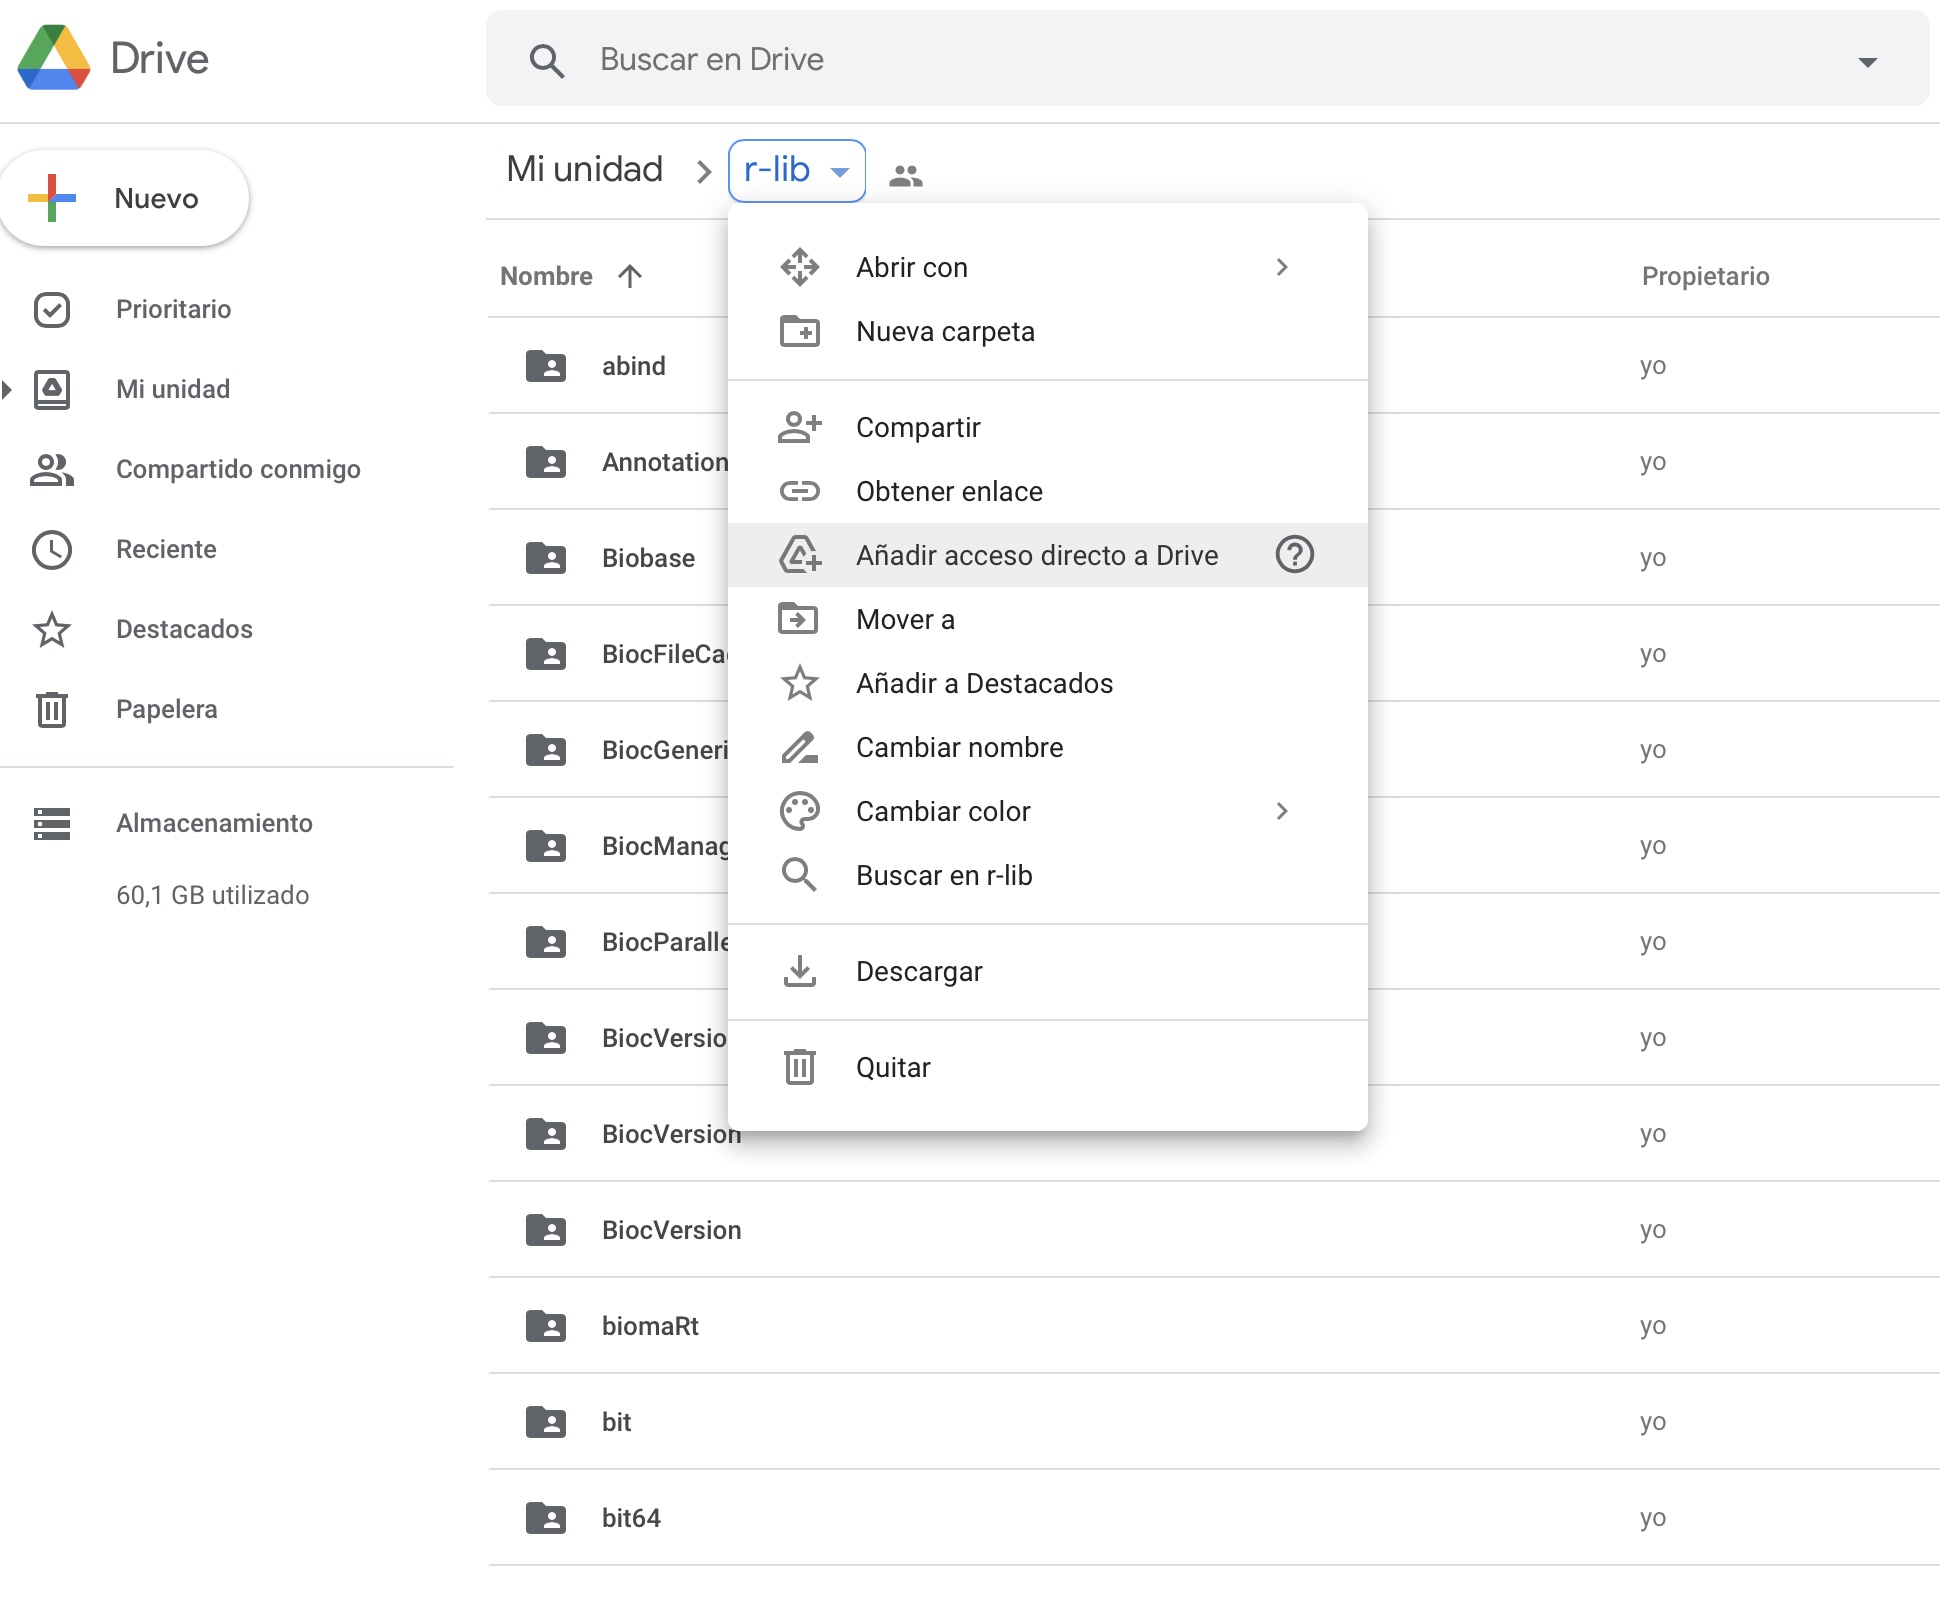

Después necesitarás indicar en qué lugar de tu Unidad/Drive deseas almacenar la carpeta compartida. Elige la carpeta "Mi unidad"/"My drive" y haz click en el botón "Añadir acceso directo"/"Add shorcut". 

*Nota: Si lo prefieres, puedes elegir cualquier carpeta dentro de "Mi unidad", pero tendrás que recordar la ruta a esa carpeta y modificar los ejemplos siguientes de forma acorde. Para facilitar el trabajo, te recomendamos que selecciones simplemente "Mi unidad"/"My Drive" y añadas el acceso directo.* 

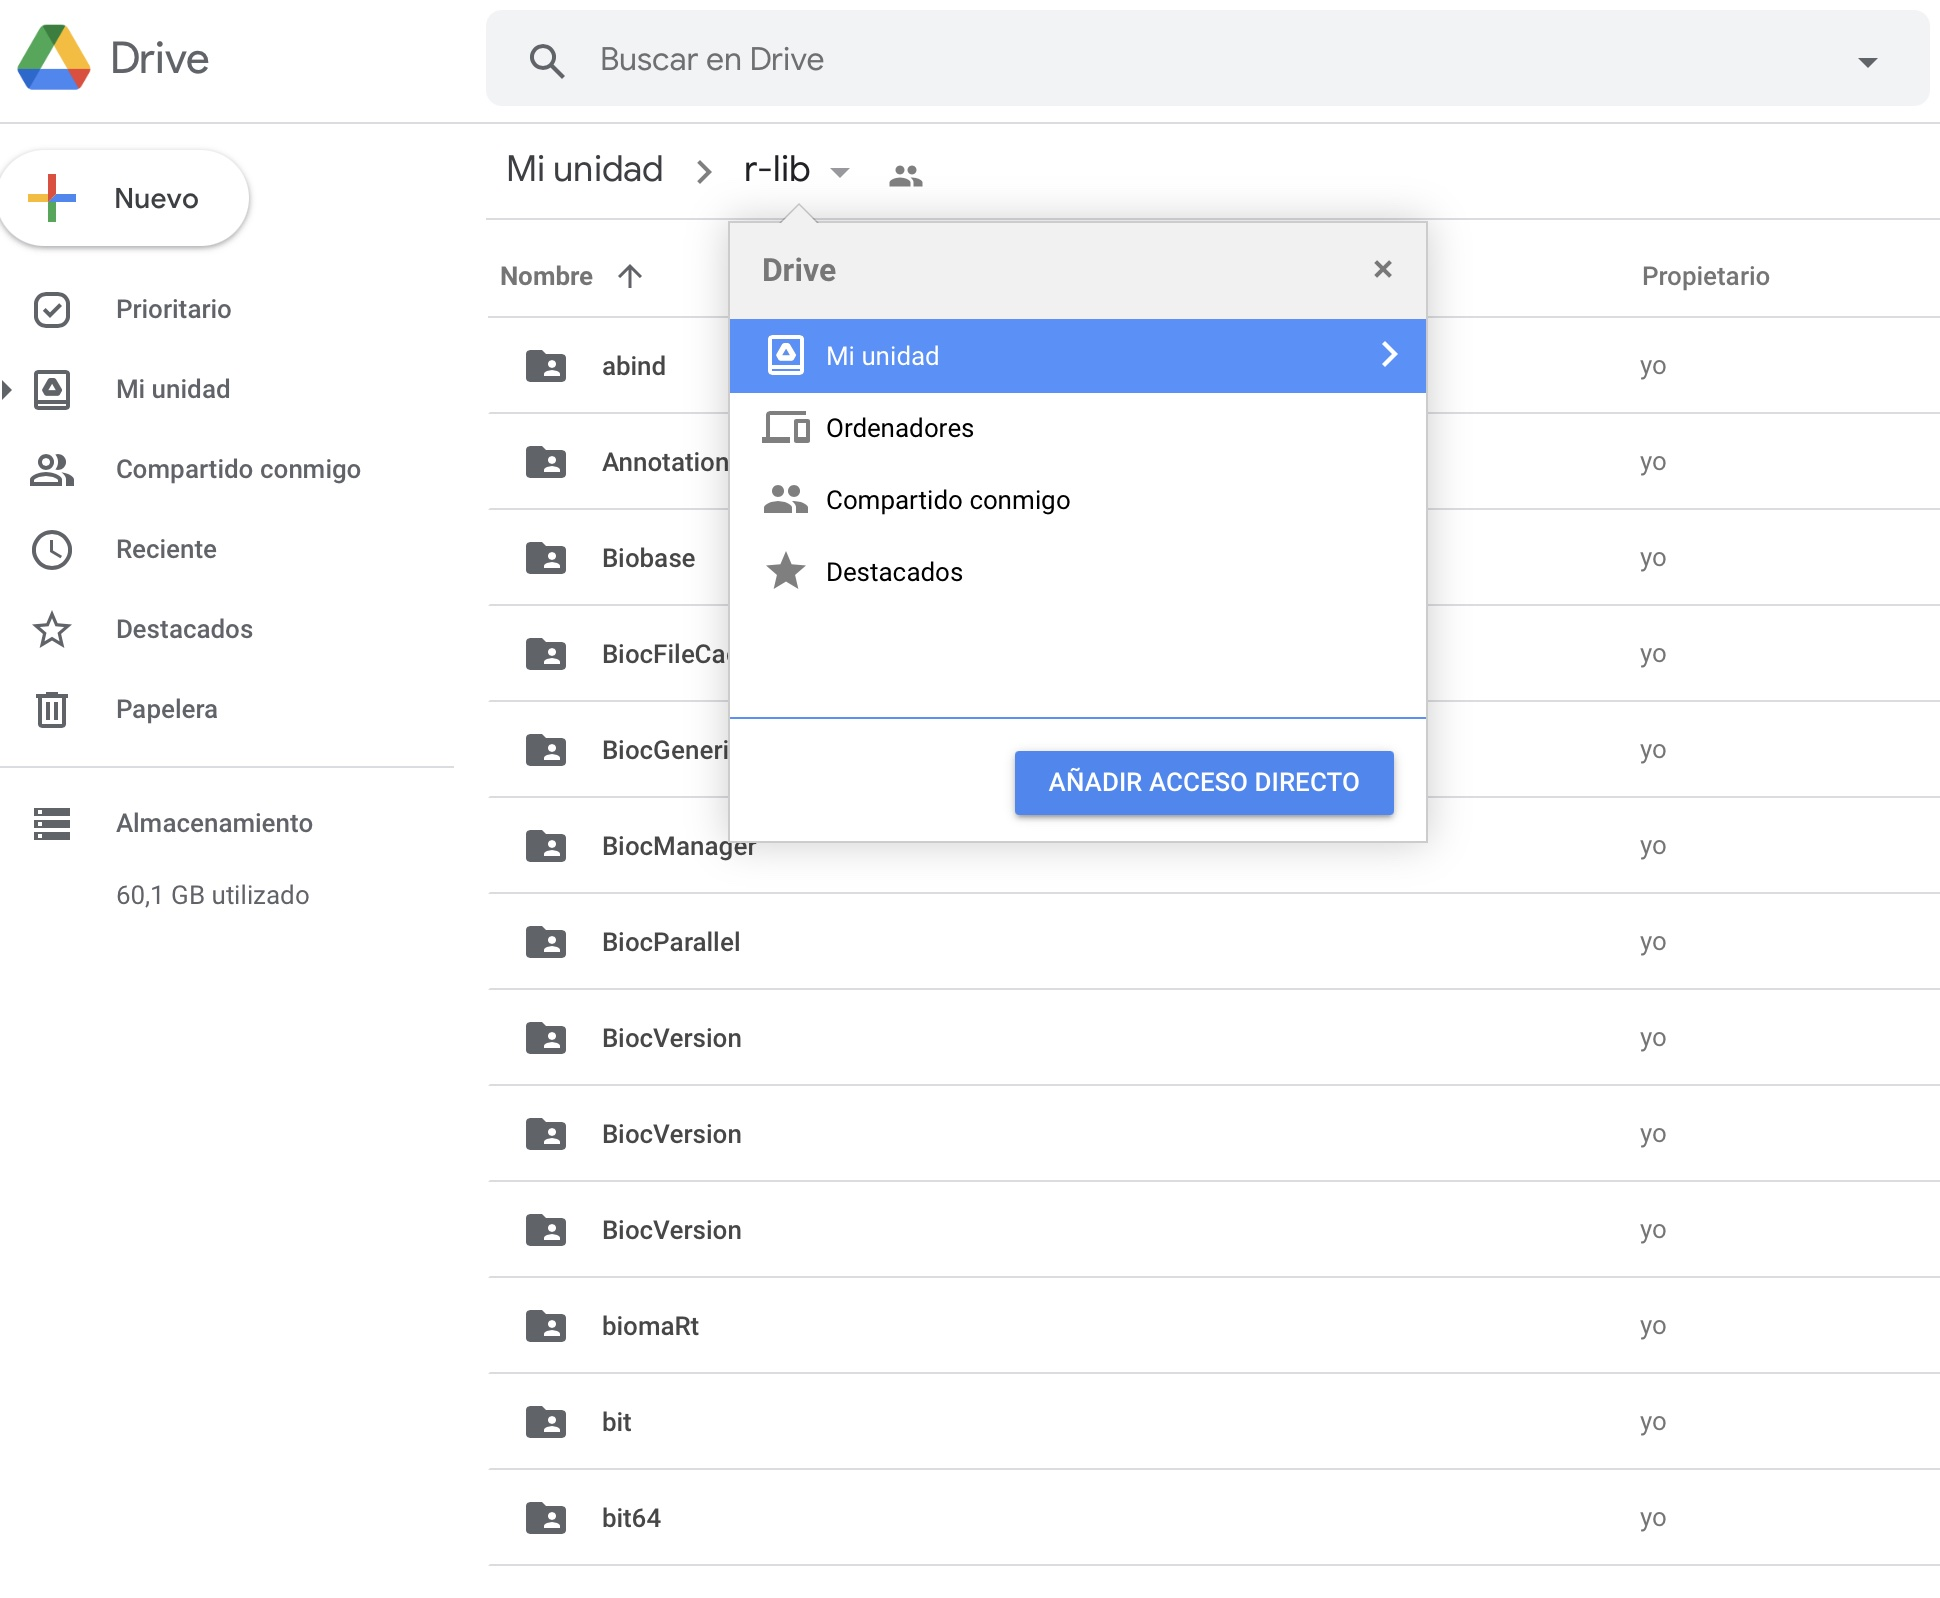

4. Ejecuta la celda de código que aparece más abajo para conectar tu unidad de Drive a Google Colab. Google Colab te pedirá que entres con tu usuario y contraseña a Google Drive (*Conectar con Google Drive*) y que autorices a Google Colab a acceder a tu Drive (*Permitir*). Google Colab y Google Drive son dos herramientas de Google, con este proceso estás permitiendo que se comuniquen entre si (y no supone un riesgo para la seguridad de tus documentos de Google Drive).





In [ ]:
from google.colab import drive
drive.mount('/content/mydrive', force_remount=True)


Mounted at /content/mydrive


Si obtienes el mensaje `Mounted at /content/mydrive`, el proceso habrá terminado con éxito.



5. Ya tienes acceso a las bibliotecas de R que necesitamos para este Módulo. Para que las librerías se importen de la carpeta r-lib de tu Google Drive, ejecuta las siguientes celdas de código.
 

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
#añadimos la carpeta MyDrive/r-lib a la ruta donde se buscan las bibliotecas
.libPaths( c( "/content/mydrive/MyDrive/r-lib" , .libPaths() ) )  
#vemos como queda la ruta de bibliotecas
.libPaths()


[1] "/content/mydrive/.shortcut-targets-by-id/1TUdSQKJyctQ7qA01EHo-wdtmNmx3oGsk/r-lib"
[2] "/usr/local/lib/R/site-library"                                                   
[3] "/usr/lib/R/site-library"                                                         
[4] "/usr/lib/R/library"                                                              


6. Realizamos comprobaciones cargando algunas de las bibliotecas que necesitaremos durante este Notebook. Si es la primera vez que cargas estas bibliotecas, este proceso puede tomar unos minutos, pero ya tendrás las bibliotecas listas para continuar con el resto del *notebook*. 

In [ ]:
%%R
library(scales)
library(BiocManager)
library(TCGAbiolinks)
library(SummarizedExperiment)
library(DT)
library(NOISeq)
library(ComplexHeatmap)
library(EDASeq)
library(factoextra)

print(sessionInfo())

R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLog

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      splines   stats4    tools     stats     graphics  grDevices
 [8] utils     datasets  methods   base     

other attached packages:
 [1] factoextra_1.0.7            ggplot2_3.3.5              
 [3] EDASeq_2.28.0               ShortRead_1.52.0           
 [5] GenomicAlignments_1.30.0    Rsamtools_2.10.0           
 [7] Biostrings_2.62.0           XVector_

Si obtienes un error del tipo `Error in library (...): there is no package called '...'`, significa que no se han instalado bien las bibliotecas. Vuelve a ejecutar los pasos anteriores 1 a 6 para comprobar que todos se hayan ejecutado correctamente. 

En otro caso, obtendrás un listado de bibliotecas instaladas de R y su número de versión, similar al siguiente:  

```
R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

[Y aquí se listan las bibliotecas instaladas de R y su número de versión]
```
Con esto, el proceso de instalación habrá terminado con éxito. Puedes continuar a la siguiente sección. 


---



**Recuerda: Si durante tus ejercicios del módulo 2 obtienes un error del tipo:** 

`Error: package ‘...’ could not be loaded` 

o 

`Error in library (...): there is no package called '...'`

**indicará que tu sesión ha expirado y debes volver a realizar los pasos anteriores (1 a 6) para cargar las bibliotecas de nuevo.**




## **4. DESCARGA DE DATOS DE TCGA** <a id='download'></a>




Antes de comenzar, cargamos las bibliotecas de R que necesitamos para esta parte del *notebook*

In [ ]:
%%R
# Cargar bibliotecas


library(TCGAbiolinks)
library(SummarizedExperiment)
library(pheatmap)
library(limma)



R[write to console]: 
Attaching package: ‘pheatmap’


R[write to console]: The following object is masked from ‘package:ComplexHeatmap’:

    pheatmap


R[write to console]: 
Attaching package: ‘limma’


R[write to console]: The following object is masked from ‘package:BiocGenerics’:

    plotMA




El proyecto TCGA permite a cualquier usuario acceder a sus datos y descargarlos de forma gratuita. El siguiente código ilustra, a mode de ejemplo, cómo descargar los datos del proyecto de melanoma de piel de TCGA (Código del proyecto: `TCGA-SKCM`). En particular, nos interesa descargar los datos de expresión génica (Categoría: `Gene expression`, tipo: `Gene expression quantification`) sobre los que ya se han procesado previamente aplicando [RSEM](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-12-323) (`file.type="normalized_results"`). En la próxima cápsula se explica en más detalle qué es la normalización y por qué es necesario normalizar los datos. De momento, es suficiente con descargar los datos utilizando el código de la siguiente celda. La descarga tomará un par de minutos.   

In [ ]:
%%R
# Descarga los datos de expresion de TCGA-SKCM. Necesitamos tres pasos:

# 1- Lanza la consulta para recuperar todos los datos que satisfagan los criterios de búsqueda 
query <- GDCquery(project = "TCGA-SKCM", 
                  data.category = "Gene expression",
                  data.type = "Gene expression quantification",
                  legacy=TRUE,
                  file.type= "normalized_results") 
# 2- Descarga los datos
GDCdownload(query)
# 3- Organiza los datos y los guarda en la variable normRSEMtranscr.counts
normRSEMtranscr.counts <- GDCprepare(query)


R[write to console]: --------------------------------------

R[write to console]: o GDCquery: Searching in GDC database

R[write to console]: --------------------------------------

R[write to console]: Genome of reference: hg19

R[write to console]: --------------------------------------------

R[write to console]: oo Accessing GDC. This might take a while...

R[write to console]: --------------------------------------------

R[write to console]: ooo Project: TCGA-SKCM

R[write to console]: --------------------

R[write to console]: oo Filtering results

R[write to console]: --------------------

R[write to console]: ooo By data.type

R[write to console]: ooo By file.type

R[write to console]: ----------------

R[write to console]: oo Checking data

R[write to console]: ----------------

R[write to console]: ooo Check if there are duplicated cases

R[write to console]: ooo Check if there results for the query

R[write to console]: -------------------

R[write to console]: o Preparing 

|====================================================|100%                      Completed after 19 s 


R[write to console]: --------------------

R[write to console]: oo Merging 473 files

R[write to console]: --------------------

R[write to console]: Starting to add information to samples

R[write to console]:  => Add clinical information to samples

R[write to console]:  => Adding TCGA molecular information from marker papers

R[write to console]:  => Information will have prefix 'paper_' 

R[write to console]: skcm subtype information from:doi:10.1016/j.cell.2015.05.044



Además de datos generados por distintas técnicas experimentales en ciencias -ómicas, TCGA pone a disposición de la comunidad los datos clínicos de las muestras de sus estudios. Existen muchos tipos de datos clínicos asociados a las muestras: el tratamiento (fármacos y dosis), estadío tumoral, recurrencia, tipo de radiación, información clínica del paciente, etc. El siguiente código ilustra cómo pueden recuperarse los datos clínicos de los pacientes (`patient`), los tratamientos (`drug`) y recidivas (`new_tumor_event`) para las muestras del estudio TCGA-SKCM

In [ ]:
%%R

## Descargar datos clínicos adicionales
# 1- Lanza la consulta para recuperar todos los datos que satisfagan los criterios de búsqueda 
query<-GDCquery(project = "TCGA-SKCM",
                file.type = "xml",
                data.category = "Clinical")  
# 2- Descarga los datos
GDCdownload(query)

# 3- Organiza los datos y los guarda en sendas variables
## Selecciona el tipo de datos clínicos a descargar en el argumento clinical.info=, puede ser:
##    drug, admin, follow_up, radiation, patient, stage_event, new_tumor_event

clinical.patient<-GDCprepare_clinic(query, clinical.info = "patient")     #basic info 
clinical.drug <- GDCprepare_clinic(query, clinical.info = "drug")         #treatment info
clinical.new_tumor_event<-GDCprepare_clinic(query, clinical.info = "new_tumor_event") #new tumor event 


R[write to console]: --------------------------------------

R[write to console]: o GDCquery: Searching in GDC database

R[write to console]: --------------------------------------

R[write to console]: Genome of reference: hg38

R[write to console]: --------------------------------------------

R[write to console]: oo Accessing GDC. This might take a while...

R[write to console]: --------------------------------------------

R[write to console]: ooo Project: TCGA-SKCM

R[write to console]: --------------------

R[write to console]: oo Filtering results

R[write to console]: --------------------

R[write to console]: ooo By file.type

R[write to console]: ----------------

R[write to console]: oo Checking data

R[write to console]: ----------------

R[write to console]: ooo Check if there are duplicated cases

R[write to console]: Warning: There are more than one file for the same case. Please verify query results. You can use the command View(getResults(query)) in rstudio

R[write to

  |======================================================================| 100%


R[write to console]: To get the following information please change the clinical.info argument

R[write to console]: => new_tumor_events: new_tumor_event 
=> drugs: drug 
=> follow_ups: follow_up 
=> radiations: radiation

R[write to console]: Parsing follow up version: follow_up_v2.0



  |===================================================================== |  99%


R[write to console]: Adding stage event information



  |======================================================================| 100%
  |===================================================================== |  99%
  |======================================================================| 100%


La información clínica de estas muestras junto con otra información derivada de distintos estudios -ómicos sobre las mismas también está a nuestra disposición en una [tabla de datos en formato Excel](https://drive.google.com/uc?id=1Wjyktizno4tUt8bjnBxpX-XUZDAWXWa4). 

Los datos de expresión genética y la tabla de datos de información clínica será utilizada en distintos módulos de este curso. 

## **5. ESTRUCTURA DE LOS DATOS DE TCGA** <a id='data![texto alternativo](https://)'></a>


Tras la descarga de datos, en esta sección proponemos un primer acercamiento a la inspección de los mismos para comprender su estructura y naturaleza, aunque será en la siguiente cápsula en la que abordaremos un análisis exploratorio completo. 

### **5.1. Datos de expresión**



Observa que los datos descargados se han guardado en la variable `normRSEMtranscr.counts`. Echamos un vistazo a su estructura 

In [ ]:
%%R
normRSEMtranscr.counts

class: RangedSummarizedExperiment 
dim: 19947 473 
metadata(1): data_release
assays(1): normalized_count
rownames(19947): A1BG A2M ... TICAM2 SLC25A5-AS1
rowData names(3): gene_id entrezgene ensembl_gene_id
colnames(473): TCGA-W3-AA21-06A-11R-A38C-07
  TCGA-ER-A19F-06A-11R-A18S-07 ... TCGA-D3-A51G-06A-11R-A266-07
  TCGA-EE-A3AB-06A-11R-A18S-07
colData names(173): barcode patient ... paper_DIPYRIM.C.T.n.C.T..mut
  paper_SHATTERSEEK_Chromothripsis_calls


De forma muy breve, en los datos de expresión génica obtenidos mediante secuenciación masiva cuantificamos la expresión de un gen mediante el número de lecturas o reads que mapean en las coordenadas genómicas correspondientes. A partir de la cuantificación y normalización del número de lecturas se obtiene una matriz, donde cada fila representa un gen y cada columna una muestra. La estructura nos indica que esta matriz de expresión contiene, en este caso, valores de expresión de `19947` genes para `473` muestras distintas. De un vistazo, podemos apreciar el listado de nombres de genes (`A1BG A2M ...`) y el de nombres de muestras (`TCGA-D9-A4Z6-06A-12R-A266-07 TCGA-EE-A2MQ-06A-11R-A18S-07 ...`). Estos listados están truncados para que toda la información principal pueda aparecer en unas pocas líneas en pantalla. 

Para facilitar el proceso de análisis posterior, vamos a descomponer esta estructura en tres partes: la matriz de expresión genética (se guarda en la variable `data`), la información sobre los genes (variable `genes.info`) y la información sobre las muestras (variable `sample.info`) 

In [ ]:
%%R
data<-assay(normRSEMtranscr.counts)
genes.info<-rowRanges(normRSEMtranscr.counts) 
sample.info<-colData(normRSEMtranscr.counts)


También podemos almacenar los datos más relevantes que necesitemos conservar en ficheros de texto, para su recuperación en posteriores *notebooks*

In [ ]:
%%R
write.table(data, file= "exprMatrix_prep_RSEM.tsv", sep="\t")

Recuerda que todas las celdas de código que empiezan por `%%R` contienen código del lenguaje R, y el resto de celdas contiene código en Python. Después de descargar los datos utilizando funciones y bibliotecas de R, los datos de interés han quedado almacenados en una serie de variables de R: `data`, `genes.info`, `sample.info`, etc. Si ahora quisiéramos analizar esa información utilizando bibliotecas de Python, podemos guardar las variables de R en variables de Python como ilustra la siguiente celda de código:

In [ ]:
# nombre_variable_en_python = %R nombre_variable_en_R
data = %R data
genes = %R genes.info
samples = %R sample.info  #por ejemplo: la información de la variable sample.info de R se guarda en la variable samples de python
clinica = %R clinical.patient
tratamientos = %R clinical.drug
recurrencia = %R clinical.new_tumor_event

El aspecto de una matriz de expresión es el que muestra la siguiente celda de código. Observa la disposición matricial con un gen por cada fila (19947 en total - numeradas desde la fila 0 a la fila 19946) y una muestra por cada columna (473 en total). 

In [ ]:
# Esto ya es código de Python (observa que no aparece el %%R)
# la variable "data" de python contiene la matriz de expresión
import pandas as pd
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472
0,504.5047,244.8919,336.4169,331.2836,56.9041,183.3201,108.2598,603.0462,641.6260,108.7017,151.4472,184.0986,289.5954,83.6439,272.4528,394.6965,246.3003,119.5660,201.6662,238.8846,230.0288,907.9719,371.5264,165.3970,350.4847,317.8984,297.2457,371.3462,709.7586,265.7345,227.5017,598.9357,174.9362,164.9102,111.3032,364.2230,143.2954,178.6372,237.6363,103.0245,...,310.9582,147.2238,352.7743,199.2104,308.2853,477.2797,332.6885,216.8428,499.2192,315.1878,290.0669,261.4332,173.0264,338.1503,137.4044,136.8071,350.0733,421.2464,285.0608,546.5837,132.5213,32.7766,198.2695,404.4958,396.3453,137.2926,26.8129,295.2969,184.7505,375.3733,509.9079,220.4015,216.8470,195.1822,187.9862,180.5988,88.9636,349.4478,97.7484,279.7274
1,3941.9447,16349.6542,17552.2154,47838.7504,22344.0675,3223.5639,35010.4314,20336.0767,28626.0358,12229.0246,118718.8683,138756.1441,9084.8501,20085.5930,37081.0178,24337.0415,36254.7059,95777.1689,28847.3795,10300.9056,79724.7630,4474.2985,8301.7192,48609.2198,40601.8779,40158.6023,38308.0278,53341.6186,20026.0207,77215.7175,17549.8691,34949.3892,21538.6719,37632.0519,8406.1147,80849.2839,12508.9938,324606.6077,22857.8965,27936.6313,...,1413.8272,81828.8905,131011.6935,7867.0421,4103.1377,17650.7266,16170.2429,3165.4123,23780.4226,13004.3004,12977.0523,148931.6431,7844.5383,19549.1098,52723.6845,10250.4922,1666.3244,3927.2321,32098.0014,93090.1867,49821.7181,125934.6549,7260.4981,47423.1552,63800.7611,53361.5831,3436.9795,32097.9434,3078.5992,7700.2402,3793.5517,50174.3514,1740.5828,169236.6356,34653.5940,13454.4052,143640.7086,4040.2938,116121.0624,143990.5130
2,39.1032,84.4794,56.5111,45.9054,92.2190,83.6367,93.4803,111.3445,27.4181,68.2423,33.7879,45.4545,94.9051,57.0643,142.1738,115.3100,70.4334,129.0416,96.9311,44.7267,37.0457,61.2245,99.2538,74.3306,61.1515,112.2940,179.4626,36.8590,55.8621,20.2051,120.7490,72.1888,79.4897,147.3823,130.1070,53.1561,185.0312,18.0479,149.7884,48.7001,...,9.8743,109.9806,39.8992,89.4049,119.8862,57.6748,80.9544,14.8046,44.7708,87.4045,19.7299,150.5854,43.2713,67.0520,39.0296,22.2522,130.2847,40.4662,42.7529,36.2796,107.4468,233.2178,97.9081,90.7252,110.5713,113.3985,193.7014,57.9824,15.9288,112.1219,45.3770,71.8147,93.5445,23.2862,159.6416,83.7985,22.8477,95.3272,66.3524,31.9909
3,0.0000,0.0000,0.0000,0.0000,0.4117,0.0000,0.4794,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2657,0.3696,0.7740,0.2893,0.0000,0.5522,0.0000,0.0000,0.0000,0.0000,0.0000,0.3434,0.0000,0.0000,0.0000,0.0000,0.2505,0.0000,0.9814,0.3760,0.0000,0.0000,0.0000,0.7366,0.7271,0.0000,...,0.0000,6.2984,0.8769,0.0000,3.9132,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3462,0.0000,0.0000,0.0000,0.0000,0.0000,0.3476,0.0000,0.0000,0.0000,0.2846,0.0000,0.0000,0.5545,0.5005,0.4263,5.1534,0.3617,0.0000,0.0000,0.0000,0.0000,0.4072,0.0000,0.0000,0.0000,0.0000,0.0000
4,1131.3869,160.3143,90.4996,2724.2845,112.3919,20.6552,30953.4995,2237.3950,129.0937,26.9640,245.8783,59.7072,66.4336,2770.7116,9559.6598,9568.5115,287.9257,87.6673,500.5784,11.0436,71.9122,8.9286,1108.4693,3234.5337,3267.4835,15714.6291,164.1075,45031.5171,22.0690,693.5718,44.3415,3758.9079,23888.4527,941.0659,2597.5443,3307.8627,164.2716,5322.2836,43.6277,266538.6305,...,11.9689,420.5426,30914.8306,14.8041,1250.4447,1413.7148,42.6076,105.0095,5459.1691,112.3297,82.2079,872.8300,1445.2618,8.6705,52182.5520,84.2886,42.2778,34372.2888,7407.3688,330.7843,112313.8298,163.2524,321.3320,85.8133,2570.0504,105.6353,210.2186,298.0127,1890.8409,1915.8380,108.4954,3140.1544,369.0974,1601.5256,5867.6441,23794.4183,13897.6821,1.4400,49958.6657,219866.3552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

En la siguiente cápsula iniciaremos un análisis exploratorio de estos datos y abordaremos dos pasos imprescindibles antes de cualquier análisis computacional: el preprocesamiento y la normalización de los datos. 


### **5.2. Datos clínicos y resultados de estudios -ómicos**

Además de los datos de expresión genética, también estaban disponibles datos clínicos de las muestras y otros resultados derivados de distintos estudios -ómicos que pueden ser interesantes para identificar patrones o relaciones novedosas en los datos. 

El siguiente código ilustra como descargar una tabla en formato excel desde una URL, guardar la tabla en una variable (`base_datos`) y visualizar su contenido para una primera exploración 

In [23]:
# Importamos la librería pandas con el alias 'pd'
import pandas as pd

# Almacenamos el enlace a nuestros datos en la variable 'url_datos'
url_datos = 'https://drive.google.com/uc?id=1Wjyktizno4tUt8bjnBxpX-XUZDAWXWa4'

# El método read_excel permite leer un libro de Excel
# El parámetro 'sheet_name' indica la hoja que nos interesa y 'usecols' nos permite
# especificar el conjunto de columnas que queremos leer (ambos son parámetros opcionales)
base_datos = pd.read_excel(url_datos, sheet_name='Supplemental Table S1D', header=1, na_values='-') 

# Mostramos la tabla completa
base_datos


,Name,MUTATIONSUBTYPES,ALL_PRIMARY_VS_METASTATIC,REGIONAL_VS_PRIMARY,UV-signature,RNASEQ-CLUSTER_CONSENHIER,MethTypes.201408,MIRCluster,ProteinCluster,OncoSignCluster,CDKN2A(cg13601799)_meth,KIT(cg10087973)_meth,BRAF_cna,NRAS_cna,MITF_cna,KIT_cna,PDGFRA_cna,KDR_cna,MYC_cna,CCND1_cna,CDK4_cna,MDM2_cna,TERT_cna,EP300_cna,NOTCH2_cna,CDKN2A_cna,PTEN_cna,TP53_cna,PPP6C_cna,ARID2_cna,IDH1_cna,MAP2K1_cna,DDX3X_cna,RAC1_cna,NF1_cna,CASP8_cna,CTNNB1_cna,PCDHGA1_cna,SERPINB3_cna,IRF7_cna,...,rnaseq_TERT.RSEM.NORM_DATA,rppa_LCK|LCK-R-V,rppa_SYK|SYK-M-V,PIGMENT.SCORE,NECROSIS,Tumour content (%) % nuceli that are tumour cells (0-100%),LYMPHOCYTE.DISTRIBUTION,LYMPHOCYTE.DENSITY,LYMPHOCYTE.SCORE,PURITY (ABSOLUTE),PLOIDY (ABSOLUTE),TOTAL.MUTATIONS,UV-RATE,CURATED_AGE_AT_INITIAL_PATHOLOGIC_DIAGNOSIS,CURATED_AGE_AT_TCGA_SPECIMEN,GENDER,CURATED_KNOWN_PRIMARY,CURATED_SITE_OF_PRIMARY_TUMOR_KNOWN_PRIMARY_ONLY,CURATED_SITE_OF_PRIMARY_TUMOR_INCLUDING_UNKNOWN,CURATED_BRESLOW,CURATED_ULCERATION,CURATED_T_STAGE_AT_DIAGNOSIS_COMPLEX,CURATED_T_STAGE_AT_DIAGNOSIS_SIMPLE,CURATED_N_STAGE_AT_DIAGNOSIS_COMPLEX,CURATED_N_STAGE_AT_DIAGNOSIS_SIMPLE,CURATED_M_STAGE_AT_DIAGNOSIS_COMPLEX,CURATED_M_STAGE_AT_DIAGNOSIS_SIMPLE,CURATED_PATHOLOGIC_STAGE_AJCC7_AT_DIAGNOSIS_COMPLEX,CURATED_PATHOLOGIC_STAGE_AJCC7_AT_DIAGNOSIS_SIMPLE,CURATED_TCGA_SPECIMEN_SITE,CURATED_DISTANT_ANATOMIC_SITE,CURATED_VITAL_STATUS,CURATED_DAYS_TO_DEATH_OR_LAST_FU,CURATED_TCGA_DAYS_TO_DEATH_OR_LAST_FU,"CURATED_MELANOMA_SPECIFIC_VITAL_STATUS [0 = ""ALIVE OR CENSORED""; 1 = ""DEAD OF MELANOMA""]",CURATED_TCGA_SPECIMEN_Distant,CC>TT/nTotal.Mut,DIPYRIM.C>T/nTotal.Mut,DIPYRIM.C>T/n(C>T).mut,SHATTERSEEK_Chromothripsis_calls
0,TCGA-BF-A1PU-01,BRAF_Hotspot_Mutants,All_Primaries,NaN,UV signature,keratin,normal-like,MIR.type.3,PROT.type.1,OSC.6,NaN,NaN,0.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,2.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,7.4675,-0.372505,-0.777214,1.0,0.0,90.0,1.0,1.0,2.0,0.92,1.78,110.0,0.836364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034483,0.793103,0.938776,chr12
1,TCGA-BF-A1PV-01,RAS_Hotspot_Mutants,All_Primaries,Primary_Disease,UV signature,keratin,CpG island-methylated,MIR.type.2,NaN,OSC.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,29.5876,NaN,NaN,0.0,0.0,95.0,2.0,2.0,4.0,0.93,2.12,372.0,0.876344,74,74,FEMALE,YES,Trunk,Trunk,9,YES,T4b,T4,N0,N0,M0,M0,Stage IIC,Stage II,Primary Tumor,[Not Available],Alive,14,13,0,Primary Tumor,0.039216,0.838235,0.982759,negative
2,TCGA-BF-A1PX-01,BRAF_Hotspot_Mutants,All_Primaries,NaN,UV signature,keratin,normal-like,MIR.type.1,PROT.type.1,OSC.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,...,8.6896,-0.183743,0.807755,3.0,30.0,80.0,3.0,2.0,5.0,0.24,1.79,470.0,0.919149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064777,0.842105,0.995215,negative
3,TCGA-BF-A1PZ-01,RAS_Hotspot_Mutants,All_Primaries,NaN,UV signature,keratin,hypo-methylated,MIR.type.2,PROT.type.2,OSC.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,-1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,14.0555,-0.594057,-0.405337,0.0,0.0,98.0,1.0,1.0,2.0,0.90,2.15,321.0,0.844237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085227,0.670455,0.991597,negative
4,TCGA-BF-A1Q0-01,Triple_WT,All_Primaries,Primary_Disease,not UV,immune,CpG island-methylated,MIR.type.2,NaN,OSC.2,1.0,0.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,...,12.3209,NaN,NaN,0.0,0.0,50.0,3.0,3.0,6.0,0.40,5.62,1063.0,0.711195,80,80,MALE,YES,Trunk,Trunk,5,YES,T4b,T4,N0,N0,M0,M0,Stage IIC,Stage II,Primary Tumor,[Not Available],Alive,17,17,0,Primary Tumor,0.012698,0.573016,0.99

Estos datos serán utilizados en siguientes módulos para ilustrar los distintos tipos de técnicas de análisis de este curso.




## **REFERENCIAS BIBLIOGRÁFICAS**
* The Cancer Genome Atlas (TCGA) https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga 
* TCGA Biolinks https://bioconductor.org/packages/release/bioc/html/TCGAbiolinks.html 
* Cancer Genome Atlas Network. Genomic Classification of Cutaneous Melanoma. Cell. 2015;161(7):1681‐1696. doi:10.1016/j.cell.2015.05.044 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580370/
* Recursos para el aprendizaje de R y python https://guides.library.cmu.edu/bioinfo/r-and-python

-----------

# **Cápsula 2 - Preprocesamiento y análisis de datos.**



**Autores**: 



*Por* **Carlos Cano Gutiérrez**

Profesor Titular de la Universidad de Granada.   
Departamento de Ciencias de Computación e Inteligencia Artificial.

*Por* **Pedro Carmona Sáez**  

Profesor Ayundante Doctor de la Universidad de Granada.    
Departamento de Estadística e Investigación Operativa.



## **ÍNDICE**



En este *notebook* se establence una introducción a algunos de los pasos en el análisis de datos omicos y qué problemas se plantean así cómo técnicas que se aplican, sobre las cuales se profundizará en los siguientes módulos. Estos son: 
1. Preprocesamiento y normalización. 
2. Manjeo de datos de expresión genética. 
3. Uso de algunas funciones útiles del lenguaje de programación R para realizar representaciones gráficas de los datos. 
4. Tipos de análisis y representaciones gráficas.


Contenidos: 
1. [Preprocesamiento y normalización de los datos de TCGA](#preprocessing)
2. [Análisis de datos y representaciones gráficas](#exploratory)






## **ANTES DE EMPEZAR**




Este *notebook* utiliza las bibliotecas y los datos que se han descargado en el *notebook* anterior (Módulo 2, Cápsula 1). Si estás empezando ahora una nueva sesión en Google Colab, o tu sesión de la Cápsula anterior ha caducado, necesitarás re-ejecutar las celdas del *notebook* anterior antes de ejecutar este. 

Para saber si tu sesión es nueva o la anterior ha caducado, prueba a ejecutar este código

In [24]:
%%R

print(sessionInfo())

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      splines   stats4    tools     stats     graphics  grDevices
 [8] utils     datasets  methods   base     

other attached packages:
 [1] limma_3.50.0                pheatmap_1.0.12            
 [3] factoextra_1.0.7            ggplot2_3.3.5              
 [5] EDASeq_2.28.0               ShortRead_1.52.0           
 [7] GenomicAlignments_1.30.0    Rsamtool

Si obtienes un error del tipo `UsageError: Cell magic %%R not found.`, significa que tu sesión es nueva o ha caducado, y tienes que volver a ejecutar el código del Módulo 2 Cápsula 1. 

Si obtienes un mensaje que comienza así: 

```
R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

[Se omite listado de bibliotecas instaladas de R y su número de versión]
```
significa que tu sesión continúa con las bibliotecas activas. Puedes seguir con el resto del *notebook*. 



## **1. PREPROCESAMIENTO Y NORMALIZACIÓN DE LOS DATOS DE TCGA** <a id='preprocessing'></a>





El **preprocesamiento** de datos es una etapa de todo proceso computacional  donde los datos se preparan para su posterior tratamiento y análisis. Esta etapa incluye cualquier tipo de transformación, re-estructuración, filtrado, eliminación de ruido,  manejo de valores faltantes, etc. En machine learning, este tipo de transformaciones sobre los datos suele denominarse manipulación de datos o **Data *wrangling***. Algunas formas de preprocesamiento habituales en datos ómicos son el filtrado de datos de mala calidad, filtrado de genes con poca variacibilidad, imputación o filtrado de casos/genes con valores faltantes, etc.  

La **normalización** es un proceso de transformación de los datos con el que se pretende estadarizar o eliminar efectos debidos a variaciones en medidas o experimentales para el posterior de estos datos. Por ejemplo, es habitual transformar el valor de variables numéricas continuas de distinta magnitud a la escala $[0,1]$ para que puedan combinarse o compararse entre sí. 
Se suele también aplicar una tranformación a escala logarítmica, ya que las propiedades de las distribuciones logarítmicas resultan más convenientes para representar esta información y facilita análisis posteriores. 

Las técnicas de normalización permiten corregir en parte la variabilidad o ruido inherente a las técnicas experimentales en ciencias -ómicas. De este modo, estas técnicas resultan fundamentales antes de combinar datos obtenidos en distintos experimentos, incluso si han sido producidos en el mismo laboratorio, por el mismo equipo técnico y utilizando los mismos instrumentos. 

La visualización de los datos obtenidos resultará fundamental para el denominado **Control de Calidad**, etapa en la que se identifican patrones anormales que señalan que existen sesgos experimentales (*batch effects*) que no han sido corregidos  por los métodos de normalización.  

En este *notebook* proponemos una serie de pasos para el preprocesamiento y normalización de los datos de expresión genética de TCGA en línea con lo propuesto en el [artículo de investigación original](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580370/) a través del que dichos datos se hicieron públicos en la comunidad científica. Estos pasos son los siguientes: 
1. Normalización del número de copias de RNAs con el método [RSEM](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-12-323) (ya aplicado sobre los datos descargados) y transformación logarítmica. 
2. Centrado del valor de expresión de los genes en su mediana.
3. Selección de los 1500 genes con mayor variabilidad. 
4. Cambios en el nombre de las muestras para que coincidan con los identificadores de muestra de las tablas con información clínica.  

Utilizaremos distintas representaciones gráficas de datos a lo largo de este proceso para ilustar su utilidad para entender las transformaciones que se llevan a cabo en los distintos pasos. 

Respecto a los datos de variables clínicas y derivadas de otros análisis -ómicos, en otros módulos se procederá a su preprocesamiento y normalización conforme sea necesario para la aplicación de las distintas técnicas. 


###1.1. Primera inspección visual de los datos

Una forma de comenzar el preprocesamiento de los datos es mediante la inspección visual de los mismos para identificar potenciales sesgos o patrones anormales. Por ejemplo, es esperable que el número total de copias de todos los genes en cada muestra sea similar. La función `colSums` permite sumar por columnas los datos de la matriz (cada columna es una muestra) y `barplot` pinta un diagrama de barras 

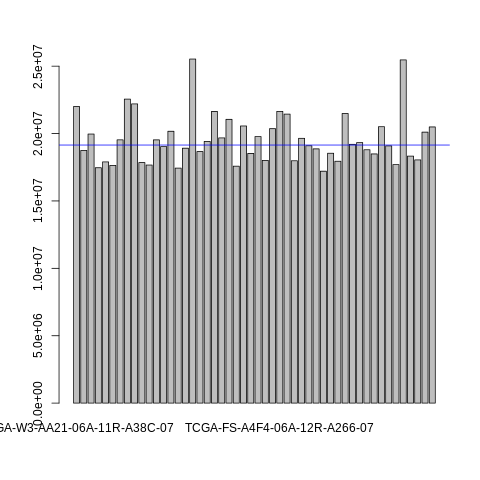

In [ ]:
%%R 
#histograma con el número total de lecturas de las 50 primeras muestras
barplot(colSums(data)[1:50])
abline(h=median(colSums(data)[1:50]),col="blue") #la línea azul representa la media del número total de lecturas de las primeras 50 muestras



Podemos observar a simple vista que el número total de lecturas varía respecto a la media (línea azul) en algunas de las muestras. Vamos a realizar un análisis más detallado. 

La función de R `TCGAanalyze_Preprocessing` calcula la correlación lineal entre pares de muestras ([Coeficiente de correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)) y representa gráficamente estas correlaciones con un mapa de calor. La casilla de fila $i$ columna $j$ representa el coeficiente de correlación de la muestra $i$ y la muestra $j$. Como este coeficiente es simétrico ($corr(i,j)=corr(j,i)$) la matriz es también simétrica y con diagonal igual a $1$.

Además de la matriz de correlaciones también se representa un diagrama de cajas o *box plot* con las distribuciones de estas correlaciones para cada muestra.

Para mostrar la correlación entre muestras y boxplots de correlación se puede ejecutar el comando

TCGAanalyze_Preprocessing(normRSEMtranscr.counts, filename="sample_correlation.png", width = 2000, height = 2000)

Puede demorar un tiempo por lo que no se ha incluído en la ejecución  


Se genera una  imagen resultante con el nombre `sample_correlation.png`, que se muestra aquí (corresponde a las 20 primeras muestras)
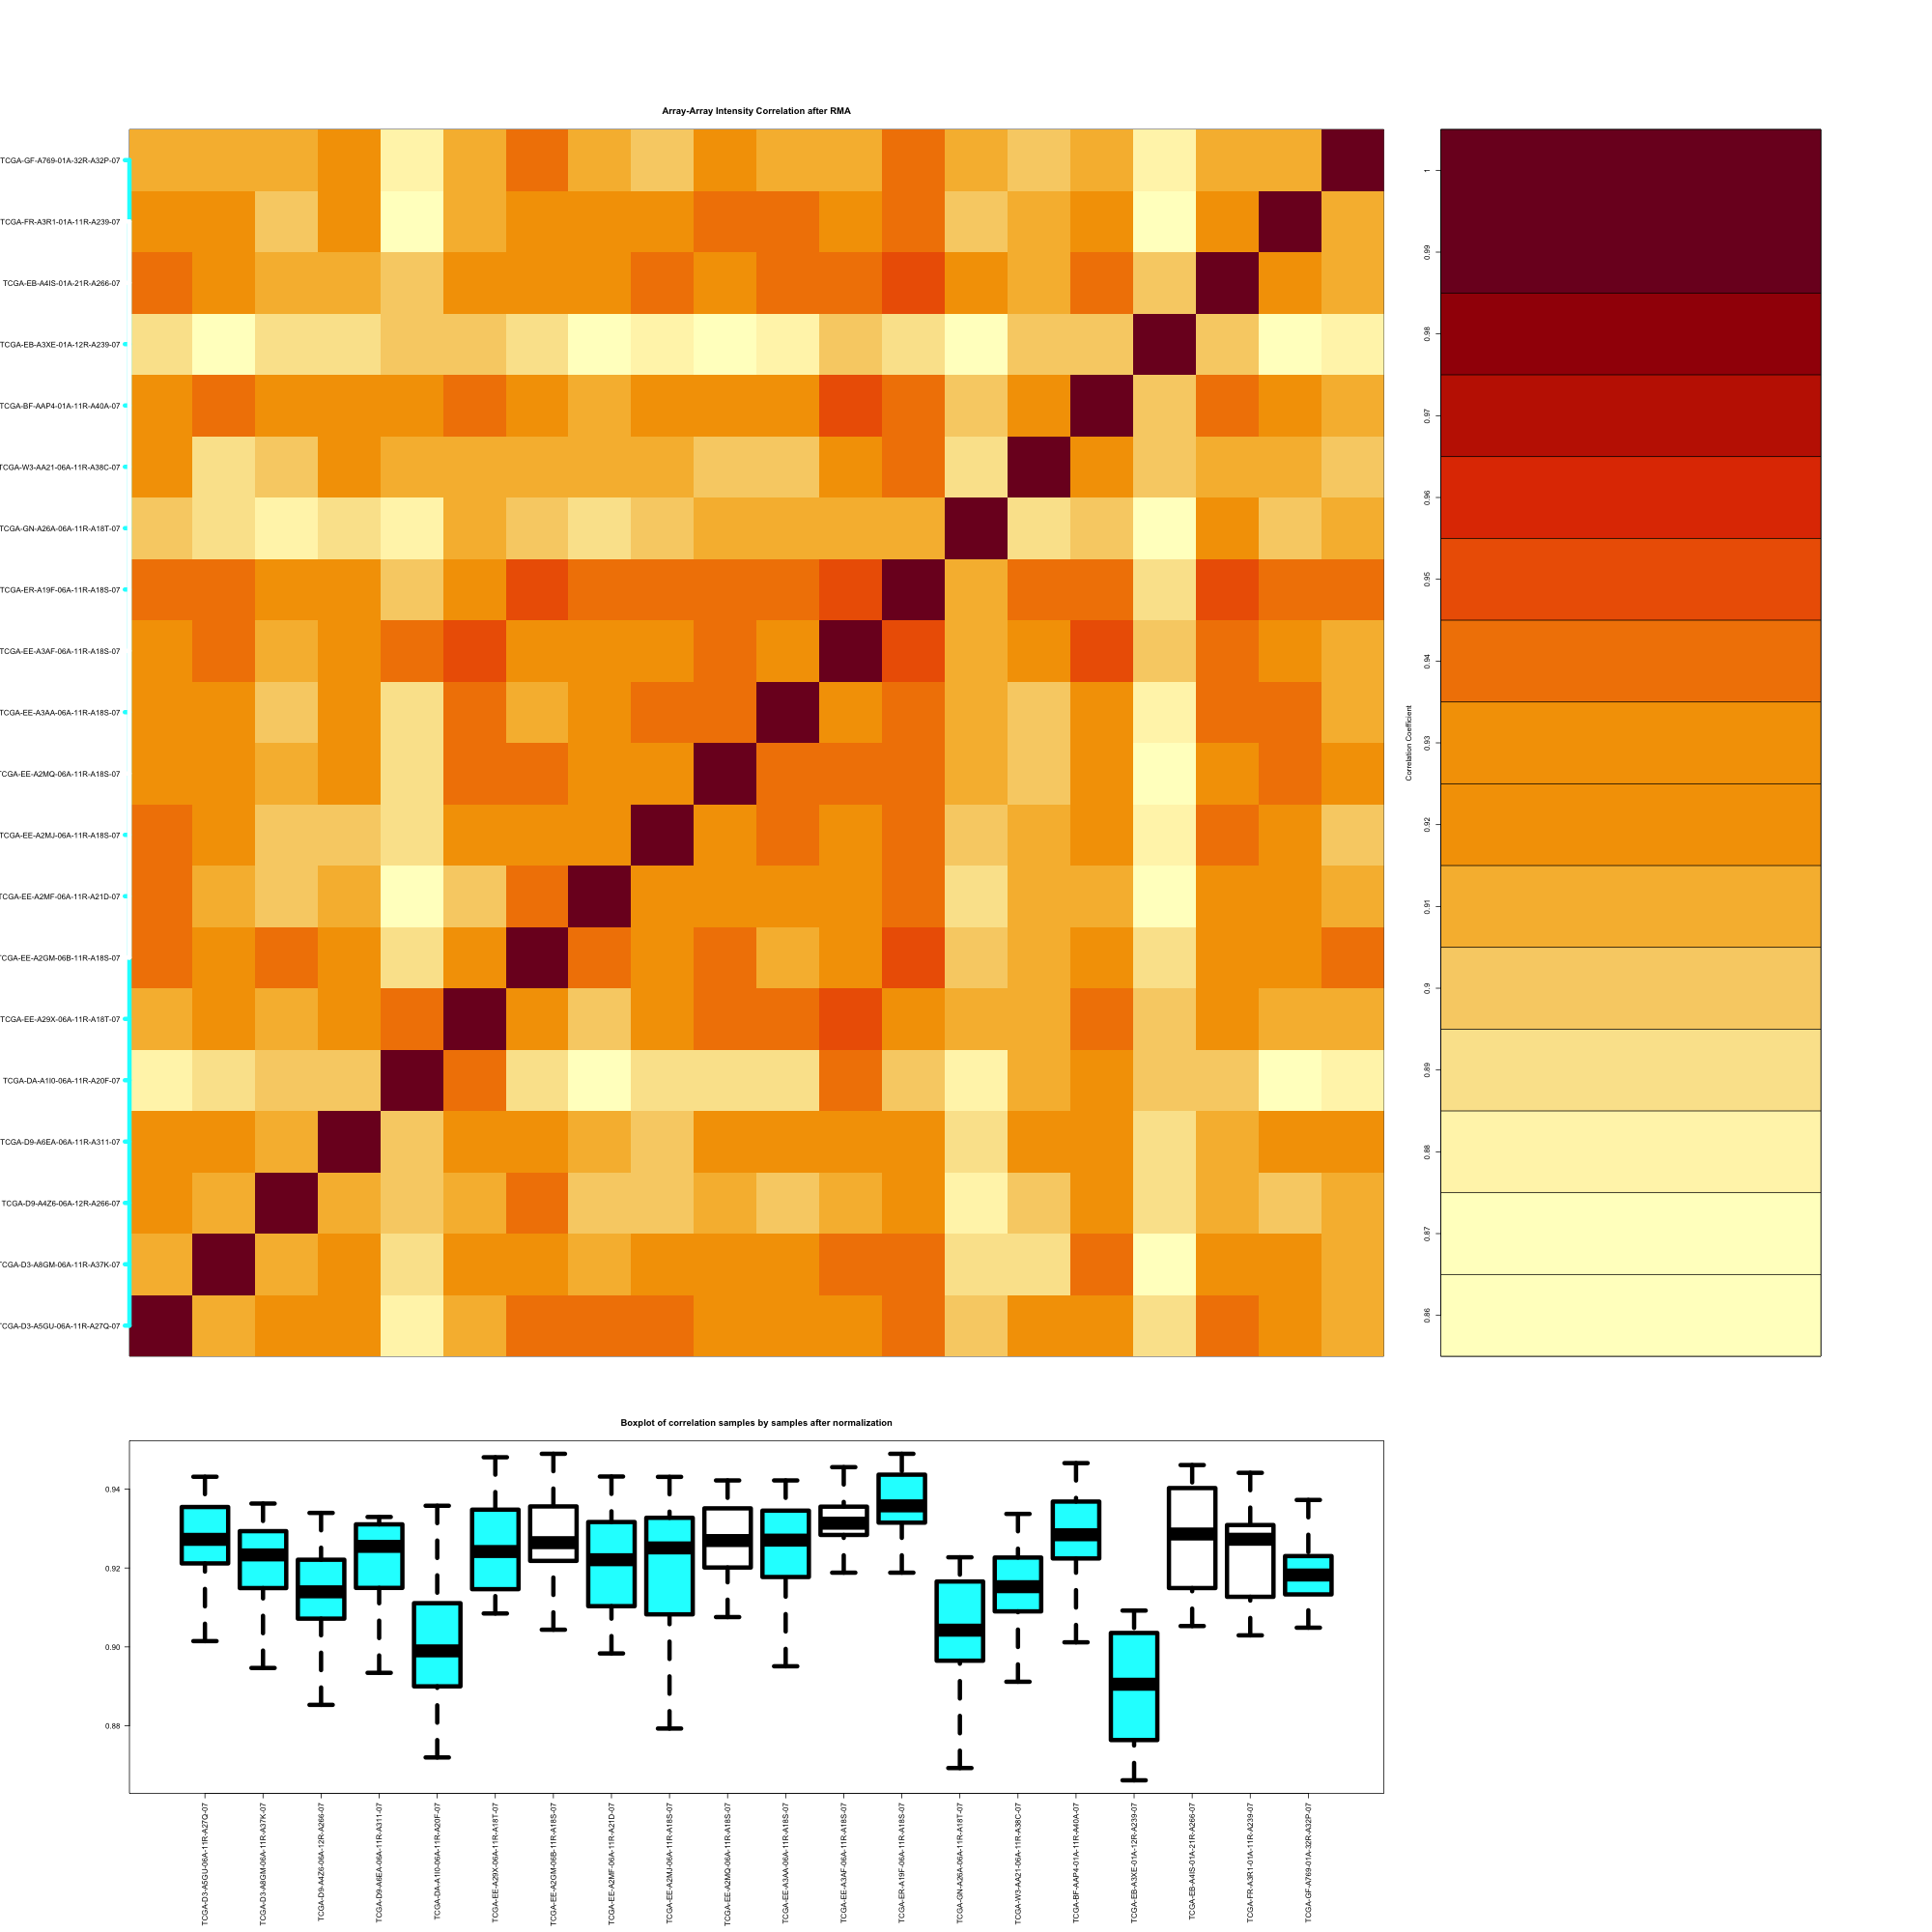

El análisis de la imagen resultante indica que existen tres muestras con un grado de correlación con el resto sensiblemente más bajo que la media. Es decir, estas tres muestras tendrían un comportamiento diferente al resto. Visualmente, podemos identificar estas muestras en el heatmap y en el diagrama de cajas: en el eje de la X, de izquierda a derecha, las muestras de las posiciones 5, 14, 17. Especialmente la muestra 17. Es probable que, más adelante, cuando estudiemos cómo se agrupan estas muestras (Módulo 6, Cápsula de Clustering) identifiquemos que una o varias de estas muestras tienen, efectivamente, un comportamiento de *outliers* (sensiblemente diferente al resto).   

Los diagramas de cajas (boxplots) también se utilizan para representar las distribuciones de valores de expresión por cada muestra para identificar segos o valores extremos (*outliers*) y validar el efecto de la normalización sobre los datos. De inicio, el diagrama de cajas sobre los datos de expresión crudos muestra lo siguiente

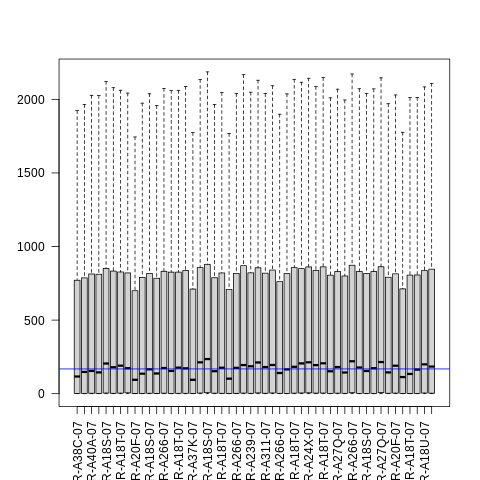

In [ ]:
%%R
# Boxplot con las distribuciones de valores de expresión de todos los genes en las 50 primeras muestras
boxplot(data[,1:50], outline=FALSE, las=2)
abline(h=median(data),col="blue")


Con estos boxplots podemos observar que la distribución de los conteos de lecturas por genes presenta cierta variabilidad entre unas muestras y otras, pero son suficientemente parecidas para considerarlas en un análisis conjunto. 

Si una muestra tuviera una caja muy desplazada respecto al resto (por ejemplo, su mediana estuviera mucho más alta o más baja que la línea azul horizontal), necesitaríamos prestar atención a esta muestra para comprobar si la normalización que se aplica consigue corregir esta desviación respecto al comportamiento del resto de muestras del conjunto. 


También puede pintarse la distribución de densidad de la expresión para cada muestra, comparando perfiles entre las mismas

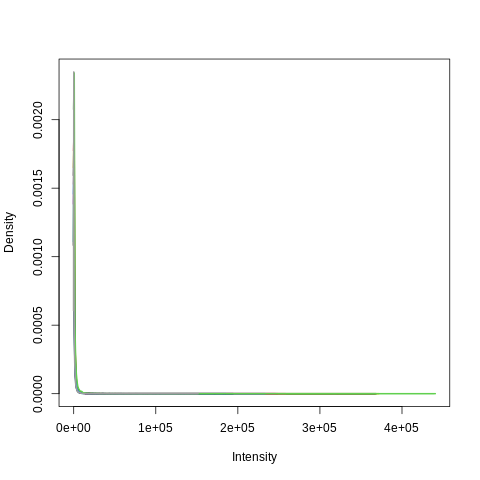

In [ ]:
%%R
# Perfil de densidad para las 10 primeras muestras
plotDensities(data[,1:10], legend=FALSE)

###1.2. Preprocesamiento y Normalización

Procedemos con el segundo (`log2`) y tercer (`median`) paso indicado arriba para el preprocesamiento y normalización de los datos. Después de cada paso representamos gráficamente las distribuciones de valores de expresión para ir comprobando el efecto de estas transformaciones

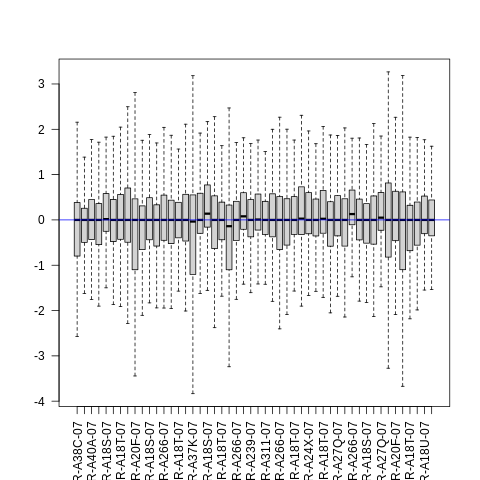

In [ ]:
%%R
# Preprocesamiento y normalización
# 1- Aplicamos log2
log2datamasuno<-log2(data+1)  #sumamos 1 a toda la matriz para evitar log(0)

# 2- Aplicamos centrado en mediana
medianbygene<-apply(log2datamasuno, 1, median)
normdata<-log2datamasuno-medianbygene

# Observamos el efecto de esta normalización mostrando las distribuciones de valores de expresión y comparando con la gráfica anterior 
boxplot(normdata[,1:50], outline=FALSE, las=2)
abline(h=median(normdata),col="blue")


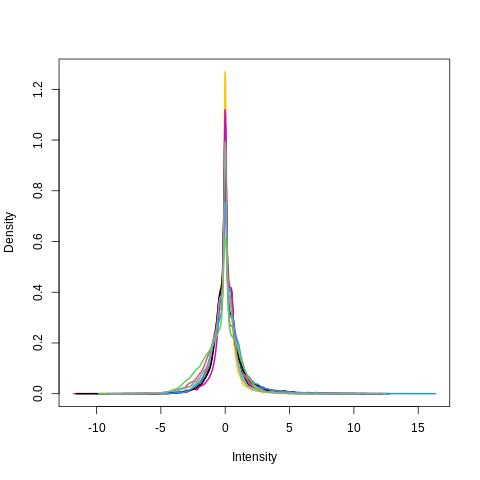

In [ ]:
%%R
# Densidad
plotDensities(normdata[,1:10], legend=FALSE)

Podemos comprobar con las visualizaciones que, en efecto, las distribuciones se han centrado en 0.

###1.3. Eliminar genes con poca variabilidad 

Un paso habitual para simplificar el análisis es eliminar los genes que apenas se expresan en ninguna muestra (los genes que tienen bajo número de copias en las muestras, se suelen denominar *flat patterns*, genes con perfiles *planos*). Un enfoque habitual para hacer este filtrado es establecer un umbral mínimo del número de copias de un gen por millón de lecturas (CPM). Se considera que los genes no lleguen a ese valor umbral de CPM apenas se expresan y serán descartados del análisis.

Otro método muy empleado para realizar este filtrado es mantener únicamente los genes que exhiben una mayor varianza en los valores de expresión entre muestras. Esta técnica de selección permite eliminar genes *planos* y centrar el análisis en los genes con mayor potencial para discriminar unas muestras de otras.


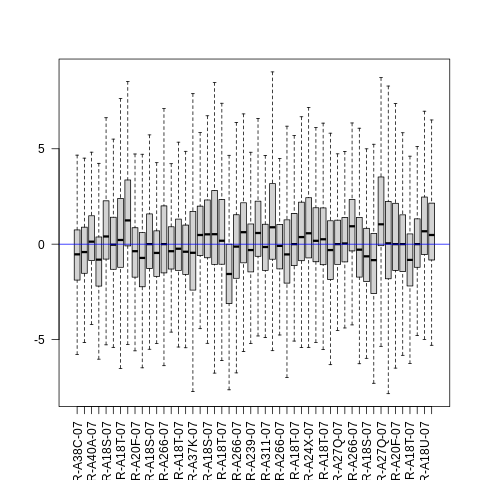

In [ ]:
%%R

# Tomar los 1500 genes expresados con mas variabilidad.
varianza<-apply(normdata, 1, var)
varianza<-sort(varianza, decreasing=TRUE) #decreasing a TRUE para coger los 1500 genes de más varianza
milquinientosgenes<-varianza[1:1500]
genes<-names(milquinientosgenes)
milquinientosgenesdata<-normdata[genes,]

# Observamos el efecto de este filtrado mostrando las distribuciones de valores de expresión y comparando con la gráfica anterior 

boxplot(milquinientosgenesdata[,1:50], outline=FALSE, las=2)
abline(h=median(milquinientosgenesdata),col="blue")


Transformaciones adicionales

Por último, realizamos transformaciones en los nombres de las muestras de la matriz de expresión para que éstos coincidan con los nombres de muestras utilizados en la tabla de información clínica descargada en la Cápsula 1. Se trata de un paso que puede carecer del interés técnico de otras celdas de código pero esta *carpintería de datos* es muy habitual para preparar los datos para su análisis computacional

In [ ]:
%%R

# ID tricks to match colnames(milquinientosgenesdata) with IDs in the mmc2 table from the Supl mat. from the paper
# remove last char from sample.info$sample so the ID matches the one in the clinical data table from the paper
sample.info$sample <- as.factor(substr(sample.info$sample, 1, nchar(as.vector(sample.info$sample))-1))
#given that 
rownames(sample.info) == colnames(milquinientosgenesdata)
#replace colnames(milquinientosgenesdata) with sample.info$sample
colnames(milquinientosgenesdata)<-sample.info$sample



Guardamos la matriz de datos resultante de este proceso en un fichero de nombre `exprMatrix_prep_RSEM_log2_median_1500maxvar.tsv` (el nombre del fichero resulta de resumir las transformaciones principales aplicadas sobre los datos: matriz de expresión preprocesada por el método RSEM+log2+mediana, en la que se han seleccionado los 1500 genes de máxima varianza)

In [ ]:
%%R 
write.table(milquinientosgenesdata, file= "exprMatrix_prep_RSEM_log2_median_1500maxvar.tsv", sep="\t")

###1.4. Pipeline alternativo de preprocesamiento y normalización (Necesario  para ejecutar 2.3. Expresión diferencial)



Existen un amplio abanico de métodos de normalización y transformaciones posibles sobre datos de expresión genética. Para un análisis más detallado, se recomienda explorar los manuales de TCGA-Biolinks o la literatura especializada al respecto (consultar las referencias). 

A modo ilustrativo, se presenta un *pipeline* de normalización alternativo al propuesto por los investigadores de la iniciativa TCGA-SKCM y la representación de las distribuciones de valores de expresión obtenidas. Este *pipeline* se descarga los datos de expresión *crudos*, sin ningún tipo de normalización preliminar, aplica una normalización de tipo `gcContent`, además de filtrado de genes planos por 1er. quartil (`quantile`) y utiliza el método de normalización [TMM](https://genomebiology.biomedcentral.com/articles/10.1186/gb-2010-11-3-r25). Los *boxplots* resultantes muestran el efecto de la normalización sobre la distribución de valores de expresión. Se puede apreciar que en este caso las distribuciones de las distintas muestras resultan más homogéneas que con la normalización anterior. 

**Nota: la ejecución de este *pipeline* tomará unos minutos, ya que requiere la descarga de nuevos datos de expresión y el preprocesamiento y normalización de los mismos. Los datos procesados con este *pipeline* se utilizarán en 2.3 expresión diferencial y cápsula 3 análisis de anotaciones funcionales.**

In [ ]:
%%R

library(TCGAbiolinks)
library(SummarizedExperiment)
library(DT)
library(NOISeq)


# Descarga de datos "crudos" (tipo "HTSeq-Counts")
# 1- Lanza la consulta para recuperar todos los datos que satisfagan los criterios de búsqueda 
query.raw <- GDCquery(project = "TCGA-SKCM", data.category = "Transcriptome Profiling", data.type = "Gene Expression Quantification", workflow.type = "HTSeq - Counts") 
# 2- Descarga los datos
GDCdownload(query.raw)
# 3- Organiza los datos y los guarda en una variable en la memoria RAM de tu ordenador
SKCM.counts <- GDCprepare(query = query.raw,
                          summarizedExperiment = TRUE)
rm(query.raw)

# Matriz de expresión
data2<-assay(SKCM.counts)

# Pre-procesamiento
# 1- Función TCGAanalyze_Preprocessing
dataPrep<-TCGAanalyze_Preprocessing(object=SKCM.counts,
                                    cor.cut = 0.6,
                                    datatype = "HTSeq - Counts")
# 2- Función TCGAanalyze_Normalization
dataNorm<-TCGAanalyze_Normalization(tabDF=dataPrep,
                                    geneInfo = TCGAbiolinks::geneInfoHT,
                                    method="gcContent")
# 3- Función TCGAanalyze_Filtering
dataFilt<-TCGAanalyze_Filtering(tabDF=dataNorm,
                                method="quantile", 
                                qnt.cut = 0.25)
# 4- Método TMM
dataTMMnorm<- tmm(dataFilt)

# Boxplot tras la normalización
boxplot(dataTMMnorm[,1:50], outline=FALSE)


R[write to console]: --------------------------------------

R[write to console]: o GDCquery: Searching in GDC database

R[write to console]: --------------------------------------

R[write to console]: Genome of reference: hg38

R[write to console]: --------------------------------------------

R[write to console]: oo Accessing GDC. This might take a while...

R[write to console]: --------------------------------------------

R[write to console]: ooo Project: TCGA-SKCM

R[write to console]: --------------------

R[write to console]: oo Filtering results

R[write to console]: --------------------

R[write to console]: ooo By data.type

R[write to console]: ooo By workflow.type

R[write to console]: ----------------

R[write to console]: oo Checking data

R[write to console]: ----------------

R[write to console]: ooo Check if there are duplicated cases

R[write to console]: ooo Check if there results for the query

R[write to console]: -------------------

R[write to console]: o Prepar

|====================================================|100%                      Completed after 33 s 


R[write to console]: Starting to add information to samples

R[write to console]:  => Add clinical information to samples

R[write to console]:  => Adding TCGA molecular information from marker papers

R[write to console]:  => Information will have prefix 'paper_' 

R[write to console]: skcm subtype information from:doi:10.1016/j.cell.2015.05.044

R[write to console]: From the 60483 genes we couldn't map 3881

R[write to console]: I Need about  334 seconds for this Complete Normalization Upper Quantile  [Processing 80k elements /s]  

R[write to console]: Step 1 of 4: newSeqExpressionSet ...

R[write to console]: Step 2 of 4: withinLaneNormalization ...

R[write to console]: Step 3 of 4: betweenLaneNormalization ...

R[write to console]: Step 4 of 4: .quantileNormalization ...



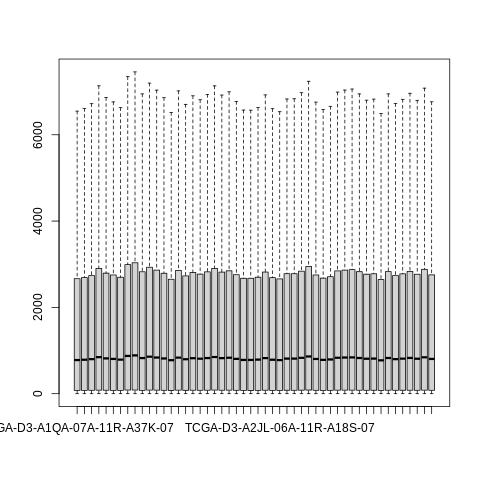

In [ ]:
%%R
boxplot(dataTMMnorm[,1:50], outline=FALSE)



## **2. ANÁLISIS DE DATOS Y REPRESENTACIONES GRÁFICAS** <a id='exploratory'></a>


Una vez filtrados y normalizados, dependiendo del tipo de información que se quiera obtener y el diseño experimental, se aplican diferentes tipos de técnicas.

En este contexto, hay numerosas técnicas estadísticas y computaciones que se aplican dependiendo del problema que se quiere abordar y las preguntas o hipótesis que se plantean. Desde el punto de vista de *machine learning* podemos hablar de:

- Técnicas de **aprendizaje no supervisado**. No se usa clasicaciones previas ni clases predenidas. Entre ellas tenemos métodos de análisis multivariante; clustering o agrupamiento, reducción de dimensionalidad, extracción de reglas asociativas, etc   

- Técnicas de **aprendizaje supervisado**. En este caso se hace uso de clases predenidas. La construcción de clasificadores o la detección de biomarcadores mediante la selección de variables que muestran diferencias significativas en los valores de expresión media entre clases son dos de las metodologías más frecuentes en este campo. 

Estas técnicas se verán en detalle en los módulos posteriores, a continuación comentaremos brevemente, a modo de introducción, funciones de R para aplicar algunas de ellas y qué tipo de información pueden dar. 

###2.1. Clustering y visualizaciones con Heatmaps

Los métodos de clustering o agrupación son una de las técnicas más ampliamente usadas para el análisis de expresión génica. Estos métodos se pueden aplicar para descubrimento de grupos de genes o de muestras que muestran similitudes en sus perfiles de expresión y han tenido aplicaciones muy útiles para establecer, por ejemplo, nuevas clasificaciones de enfermedades basadas en patrones moleculares. 

Los algoritmos de clustering jerárquico y *consensus clustering* son algunos de los más usados en este contexto. Estos métodos establecen un dendograma que sirve para explorar grupos de elementos que muestran mayor similitud así como base para establecer una división posterior en grupos. Los mapas de calor o *heatmaps* son una visualización muy útiles también en estas técnicas y permiten representar visualmente la matriz de expresión ordenada por las similitudes entre elementos. Estas representaciones usualmente van acompañadas de una reordenación de filas y columnas, de forma que objetos similares (genes en las filas y muestras en las columnas) se colocan en posiciones colindantes. De este modo, permiten apreciar de un vistazo los perfiles de expresión de genes (filas) y muestras (columnas) e identificar agrupamientos o clusters en los datos, como veremos con detalle en el Módulo 6. Cápsula 2. 

R tiene funciones muy potentes para representar *heatmaps* y enriquecerlos con anotaciones que se añaden como leyendas coloreadas para las muestras o los genes. Estas visualizaciones nos permiten confrontar la estructura que se deriva del análisis de los datos (los clusters) con la información conocida para las muestras. Esta imagen ilustra este tipo de funcionalidad, aunque, de nuevo, se verá en profundidad en la Cápsula 2 del Módulo 6. 

png 
  2 


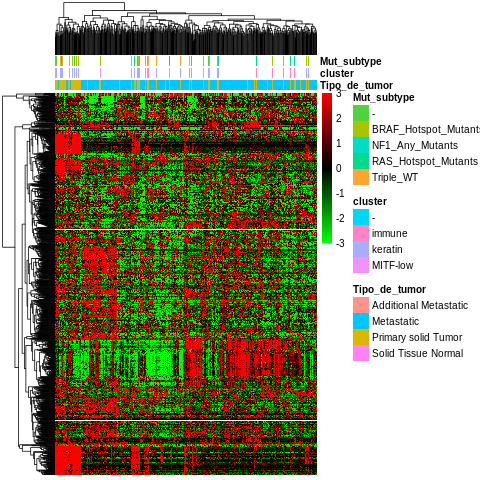

In [ ]:
%%R

definitiondata<-data.frame( row.names=rownames(sample.info),Tipo_de_tumor=sample.info@listData[["definition"]])
subtypedata<-data.frame(row.names=rownames(sample.info), cluster=sample.info@listData[["paper_RNASEQ.CLUSTER_CONSENHIER"]])
subtypemutationdata<-data.frame(row.names=rownames(sample.info), Mut_subtype=sample.info@listData[["paper_MUTATIONSUBTYPES"]])
anotacionesfila<-data.frame(cbind(definitiondata, subtypedata, subtypemutationdata))

my_colors=c("green", "black", "red")
my_colors=colorRampPalette(my_colors)(100)
pheatmap(milquinientosgenesdata, color= my_colors, show_rownames = F, show_colnames = F, breaks = seq(-3,3,length.out = 100), annotation_col = anotacionesfila)
TCGAvisualize_Heatmap(milquinientosgenesdata)


###2.2. Reducción de dimensionalidad

Recordar que en este tipo de estudios se suele tener decenas de miles de variables cuantificadas en unas pocas decenas de muestras. Por tanto, es frecuente también el uso de técnicas de reducción de dimensionalidad como el análisis de componentes principales (PCA) mediante la cual se sustituyen las observaciones originales por *n* combinaciones lineales, siendo *n* mucho menor las dimensiones originales. Se seleciona *n* componentes principales de forma que representen una proporción razonable de la variación total.

La función de R `prcomp` calcula las componentes principales de una matriz dada como argumento. El siguiente código ilustra como identificar sobre la submatriz `milquinientosgenesdata[1:50,1:20]` los perfiles genéticos de máxima varianza. Primero, consideramos que cada gen es una observación y las muestras son las variables.

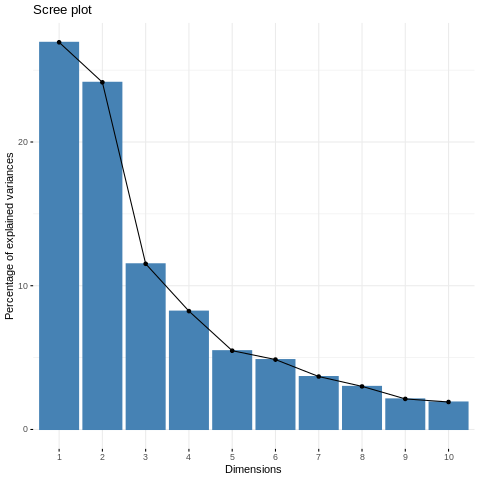

In [ ]:
%%R
# 1- PCA aplicado sobre los genes
library(factoextra)
pca <- prcomp(milquinientosgenesdata[1:50,1:20])
fviz_eig(pca)



Este gráfico representa cuánta variabilidad está explicada por cada una de las componentes principales calculadas. En este caso, comprobamos que el 45% de la varianza en los datos está explicada por las dos primeras componentes principales. El siguiente gráfico muestra cómo se representan los genes en un espacio definido por estas dos componentes principales


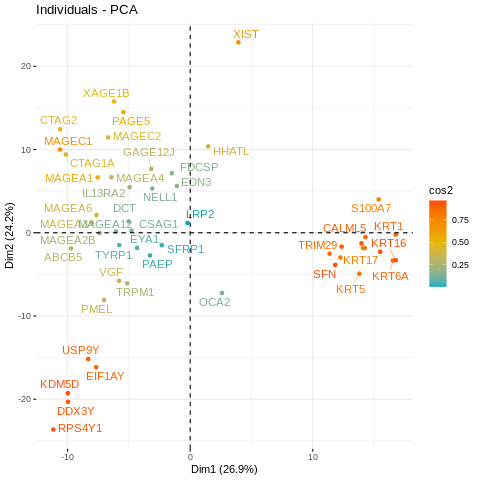

In [ ]:
%%R
library(scales)
fviz_pca_ind(pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

Ahora, procedemos de igual modo pero consideramos cada muestra una observación, y cada gen una variable. Para ello, trasponemos la matriz anterior con la función `t`. El resto del código no cambia

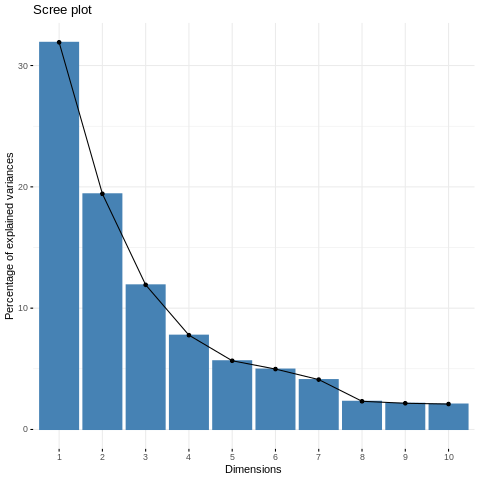

In [ ]:
%%R
# 2- PCA aplicado sobre las muestras (transponiendo la matriz original con la funcion t)
pca <- prcomp(t(milquinientosgenesdata[1:50,1:20]))
fviz_eig(pca)


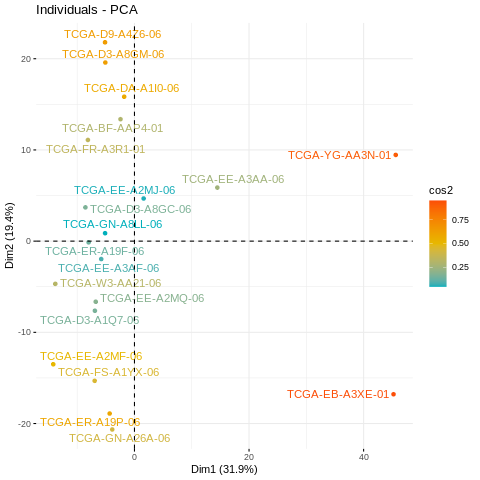

In [ ]:
%%R
fviz_pca_ind(pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

Estas representaciones gráficas nos permiten realizar un primer acercamiento a los datos y a su distribución en el espacio, identificando de forma preliminar muestras (genes) correladas y agrupamientos de muestras (genes) en los datos. 

###2.3. Expresión diferencial

Uno de los principales objetivos de muchos estudios de transcriptómica es encontrar genes que presentan un patrón de expresión diferencial entre distintos tipos de muestras. Por ejemplo, la identificación de genes que muestran una expresión diferencial en pacientes respecto a controles sanos. 

En estos estudios se evalua si existe una diferencia significava en la media de expresión de cada gen en dos, o mas, condiciones analizadas. Dados un conjunto de muestras pertenecientes a dos grupos experimentales, A y B, como controles sanos y muestras tumorales, para cada gen se lleva a cabo un contrate de hipótesis

${H_0}: \mu_A=\mu_B$

${H_1}: \mu_A \neq\mu_B$

Aplicando el test correspondiente, se asigna a cada gen un *p-valor* que se usa para seleccionar aquellos que muestran una diferencia significativa en la expresión entre las dos condiciones. 

Existe mucha bibliografía respecto a los análisis de expresión diferencial. Para introduciros en el tema, podéis consultar la referencia Costa-Silva et al., 2017 de la bibliografía. 

El siguiente código ilustra cómo aplicar un análisis de expresión diferencial (DEA) entre muestras de tipo *Metástasis* y las de tipo *Tumor Sólido Primario* utilizando la función `TCGAanalyze_DEA` sobre los datos descargados anteriormente del proyecto TCGA-SKCM. 

In [ ]:
%%R

#Información de muestras
sample.info<-colData(SKCM.counts)
# Separar los datos en melanoma y tumor sólido primario.
TMdata<-dataTMMnorm[,which(sample.info@listData[["definition"]]=="Metastatic")]
PSTdata<-dataTMMnorm[,which(sample.info@listData[["definition"]]=="Primary solid Tumor")]

# Análisis de expresión diferencial entre metástasis y tumores sólidos primarios, se seleccionan 50 muestras de cada tipo.
dataDEGs <- TCGAanalyze_DEA(mat1 = TMdata[,1:50],
                        	mat2 = PSTdata[,1:50],
                        	Cond1type = "Metastatic",
                        	Cond2type = "Primary solid Tumor",
                        	fdr.cut = 0.01 ,
                        	logFC.cut = 1,
                        	method = "glmLRT") 

genesexpresadosdif <- as.character(rownames(dataDEGs))
genesexpresadosdif[1:10]


R[write to console]: Batch correction skipped since no factors provided

R[write to console]: ----------------------- DEA -------------------------------

R[write to console]: there are Cond1 type Metastatic in  50 samples

R[write to console]: there are Cond2 type Primary solid Tumor in  50 samples

R[write to console]: there are  17394 features as miRNA or genes 

R[write to console]: I Need about  58 seconds for this DEA. [Processing 30k elements /s]  

R[write to console]: ----------------------- END DEA -------------------------------



 [1] "ENSG00000004809" "ENSG00000006016" "ENSG00000006283" "ENSG00000007350"
 [5] "ENSG00000008118" "ENSG00000011201" "ENSG00000012223" "ENSG00000019991"
 [9] "ENSG00000039139" "ENSG00000052344"


El resultado de estos análisis es una lista de genes diferencialmente expresados, candidatos a ser estudiados en profundidad para identificar biomarcadores. Se trata de una tarea muy habitual en bioinformática. La siguiente cápsula muestra cómo abordar un análisis funcional para intentar interpretar la información de pathways or procesos biológicos que están asociados a estas listas de genes.  

## Referencias 
1. The Cancer Genome Atlas (TCGA) https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga 
2. TCGA Biolinks https://bioconductor.org/packages/release/bioc/html/TCGAbiolinks.html 
3. Manual de uso TCGA-Biolinks https://www.bioconductor.org/packages/devel/bioc/vignettes/TCGAbiolinks/inst/doc/analysis.html
4. Cancer Genome Atlas Network. Genomic Classification of Cutaneous Melanoma. Cell. 2015;161(7):1681‐1696. doi:10.1016/j.cell.2015.05.044 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4580370/
5. Abrams, Z.B., Johnson, T.S., Huang, K. et al. A protocol to evaluate RNA sequencing normalization methods. BMC Bioinformatics 20, 679 (2019). https://doi.org/10.1186/s12859-019-3247-x
6. Costa-Silva, J., Domingues, D., and Lopes, F.M. (2017). RNA-Seq differential expression analysis: An extended review and a software tool. PLOS ONE 12, e0190152.


# **Cápsula 3 - Análisis de enriquecimiento de anotaciones funcionales.**



**Autores**: 


*Por* **Pedro Carmona Sáez**  

Profesor Ayundante Doctor de la Universidad de Granada.    
Departamento de Estadística e Investigación Operativa.

*Por* **Carlos Cano Gutiérrez**

Profesor Titular de la Universidad de Granada.   
Departamento de Ciencias de Computación e Inteligencia Artificial.


## INDICE
En este *notebook*: 
1. Aprenderemos qué es el análisis de enriquecimiento de anotaciones funcionales en experimentos con datos -omicos.
2. Aprenderemos a utilizar los principales métodos . 
3. Aprenderemos a representar los resultados de este tipo de análisis.
4. Aprendemos a manejar algunas de las principales fuentes de información de funciones biológicas y rutas metabólicas.

Contenidos: 
1. [Análisis de enriquecimiento de anotaciones](#enrichment)
2. [Gene Set Enrichment Analysis](#exploratory)
3. [Representaciones gráficas de análisis de anotaciones](#visualizaion)




## **1. ¿QUÉ ES EL ANÁLISIS DE ENRIQUECIMIENTO DE ANOTACIONES FUNCIONALES?** <a id='funcional'></a>





El resultado del análisis de datos omicos consiste, en la mayoría de las ocasiones, en grandes listas de genes o proteínas que están asociados a un determinado fenotipo, por ejemplo, genes diferencialmente expresados entre dos condiciones (pacientes Vs sanos), genes con patrones de metilación comunes, etc. A partir de este punto, el objetivo del estudio se centra en extraer conocimiento biológico a partir de estos genes. Este conocimiento ayudará a entender cuáles son los procesos y funciones biológicas desreguladas y servirá como punto de partida para conocer las bases moleculares de los fenotipos que se están estudiando.

Para ello, una de las aproximaciones clásicas ha consistido en evaluar si hay algún tipo de información (en forma de anotaciones) que está sobre-representada en la lista de genes respecto el resto de genes que hay en el genoma. Este tipo de análisis, denominado análisis funcional o análisis de enriquecimiento, se basa en anotar los genes con información disponible en diferentes bases de datos como Gene Ontology (GO: http://geneontology.org/) o Kyoto Encyclopedia of Genes and Genomes (KEGG: https://www.genome.jp/kegg/), y establecer las frecuencias de cada término en la lista de genes y el resto del genoma, de forma que se puede aplicar un test estadístico para determinar qué anotaciones funcionales están enriquecidas de forma significativa en la lista.

En este *notebook* aprenderemos a aplicar algunos de los métodos de análisis funcional más extendidios, así como algunas de las principales bases de datos de anotaciones y explorar y visualizar los resultados 

## **2. ANÁLISIS DE ENRIQUECIMIENTO DE ANOTACIONES INDIVIDUALES** <a id='single'></a>



El análisis de enriquecimiento se basa en ver si hay una sobrerrepresentación de una determinada anotación en la lista de genes de interés respecto al resto del genoma. Uno de los test estadísticos usados con más frecuencia en este contexto es el basado en la distribución hipergeométrica, donde para cada anotación se puede calcular la probabilidad de encontrar un determinado número de genes asociados a la misma:

$P(X=i)={\frac{\binom{M}{i}\binom{N-M}{N-i}}{\binom{N}{n}}}$

Donde $N$ es el número total de genes en el genoma, $M$ es el número que presentan una determinada anotación, $n$ es el número de genes en la lista e $i$ el número de genes en la lista con la anotación.

Se calcula el p-valor, pero hay que tener en cuenta que cuando se analizan numerosos genes el p-valor se tiene que corregir para tener en cuenta el problema de las comparaciones múltiples, para lo que se suele aplicar corrección de Bonferroni o False Discovery Rate (FDR) entre las más frecuentes.



###2.1. Ejemplo 1. Enriquecimiento de términos de Gene Ontology

Gene Ontology (GO) es un recurso ampliamente utilizado que ha establecido una ontología genética que categoriza en anotaciones el conocimiento científico actual sobre las funciones de los genes de muchos organismos diferentes, desde humanos hasta bacterias. Es una de las principales fuentes de información para análisis funcional y ha sido citado en decenas de miles de publicaciones.

El proyecto se inició en 1998 cuando los investigadores que estudiaban el genoma de tres organismos modelo: *Drosophila melanogaster* (mosca de la fruta), *Mus musculus* (ratón) y *Saccharomyces cerevisiae* (levadura) aceptaron trabajar colaborativamente en un esquema de clasificación común para la función de genes.

GO ofrece dos recursos principales:
- La ontología en sí. Es decir, el vocabulario de términos y la relación entre ellos para los diferentes tipos de funciones biológicas (Función Molecular), las vías que llevan a cabo diferentes programas biológicos (Proceso Biológico) y lugares donde ocurren estos (Componente Celular)

- El corpus de las anotaciones GO para los diferentes genes de un gran número de organismos 

In [ ]:
%%R
library(clusterProfiler)
library(org.Hs.eg.db)

# Crear lista de genes (o cargarla desde un fichero)
gene<-c("4312","8318","10874","55143","55388","991","6280","2305","9493","1062","3868","4605","9833","9133","6279","10403","8685","597","7153","23397","6278","79733","259266","1381","3627","27074","6241","55165","9787","7368","11065","55355","9582","220134","55872","51203","3669","83461","22974","10460","10563","4751","6373","8140","79019","820","10635","1844","4283","27299","55839","27338","890","9415","983","54821","10232","4085","6362","9837","5080","7850","81930","5918","81620","332","55765","79605","3832","6286","5163","2146","3002","50852","7272","2568","64151","51806","366","2842")

#Usaremos como referencia unos datos precargados en el paquete DOSE
data(geneList, package="DOSE")

# Ejecutamos análisis de enriquecimiento de términos de Gene Ontology, para Componente Celular
GO <- enrichGO(gene = gene, universe = names(geneList), OrgDb = org.Hs.eg.db,	ont= "CC", pAdjustMethod = "BH", pvalueCutoff = 0.01, qvalueCutoff = 0.05, readable = TRUE)

head(GO)




R[write to console]: 

R[write to console]: clusterProfiler v4.2.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141

R[write to console]: 
Attaching package: ‘clusterProfiler’


R[write to console]: The following object is masked from ‘package:XVector’:

    slice


R[write to console]: The following object is masked from ‘package:IRanges’:

    slice


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    rename


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: Loading required package: AnnotationDbi

R[write to console]: 
Attaching package: ‘AnnotationDbi’


R[write to console]: The following object is mas

                   ID                              Description GeneRatio
GO:0000775 GO:0000775           chromosome, centromeric region     16/80
GO:0098687 GO:0098687                       chromosomal region     19/80
GO:0000779 GO:0000779 condensed chromosome, centromeric region     14/80
GO:0000776 GO:0000776                              kinetochore     13/80
GO:0005819 GO:0005819                                  spindle     18/80
GO:0000793 GO:0000793                     condensed chromosome     15/80
             BgRatio       pvalue     p.adjust       qvalue
GO:0000775 158/11853 5.958856e-15 8.521164e-13 6.899728e-13
GO:0098687 272/11853 1.261831e-14 9.022094e-13 7.305339e-13
GO:0000779 114/11853 2.272167e-14 1.083066e-12 8.769767e-13
GO:0000776 106/11853 2.110285e-13 7.544268e-12 6.108719e-12
GO:0005819 306/11853 1.319855e-12 3.171128e-11 2.567715e-11
GO:0000793 186/11853 1.330543e-12 3.171128e-11 2.567715e-11
                                                                     

###2.2. Ejemplo 2. Enriquecimiento de rutas de KEGG

KEGG (Kyoto Encyclopedia of Genes and Genomes) es un poyecto que se inició en 1995 por el programa del genoma humano japonés y se ha convertido en un recurso muy utilizado para análisis de rutas enzimáticas y redes de interacciones moleculares específicas por organismo. 
KEGG proporciona no sólo una representación gráfica de estas redes y cómo los genes y proteínas se interconectan, si no también la anotación para cada gen de en qué vías y rutas está implicado cada gen

In [ ]:
%%R
enrichKEGG <- enrichKEGG(gene         = gene,
                 organism     = 'hsa',
                 pvalueCutoff = 0.05)
head(enrichKEGG )




R[write to console]: Reading KEGG annotation online:


R[write to console]: Reading KEGG annotation online:




               ID                                                   Description
hsa04110 hsa04110                                                    Cell cycle
hsa04657 hsa04657                                       IL-17 signaling pathway
hsa04218 hsa04218                                           Cellular senescence
hsa04061 hsa04061 Viral protein interaction with cytokine and cytokine receptor
hsa04114 hsa04114                                                Oocyte meiosis
hsa04914 hsa04914                       Progesterone-mediated oocyte maturation
         GeneRatio  BgRatio       pvalue     p.adjust       qvalue
hsa04110      7/43 126/8112 3.737261e-06 0.0004260477 0.0003855279
hsa04657      5/43  94/8112 1.275900e-04 0.0048718777 0.0044085320
hsa04218      6/43 156/8112 1.555302e-04 0.0048718777 0.0044085320
hsa04061      5/43 100/8112 1.709431e-04 0.0048718777 0.0044085320
hsa04114      5/43 131/8112 5.986236e-04 0.0136486178 0.0123505498
hsa04914      4/43 102/8112 1.995907e-

Las pathways se pueden visualizar con los genes asociados a las mismas, usando el comando

browseKEGG(enrichKEGG, 'hsa04110')

Ver por ejmplo
www.kegg.jp/kegg-bin/show_pathway?hsa04110/8318/991/9133/890/983/4085/7272

## **3. ANÁLISIS DE ENRIQUECIMIENTO DE CO-ANOTACIONES (MODULAR ENRICHMENT)**<a id='modular'></a>


Otro tipo de análisis tiene en cuenta la relación que hay entre diferentes términos y el hecho de que un mismo gen puede estar anotado con diferentes fuentes.
Encontrar relaciones entre anotaciones basadas en patrones de co-ocurrencia puede ampliar nuestra comprensión de los eventos biológicos asociados con un sistema experimental dado. Por ejemplo, un conjunto de genes expresados diferencialmente puede estar asociado con la activación de procesos biológicos que están restringidos a ciertos orgánulos celulares. La recuperación de tales asociaciones proporciona información significativa y adicional para la interpretación de los resultados experimentales.
En este ejemplo usaremos la aplicación GENECODIS (https://genecodis.genyo.es/), que es capaz de integrar diferentes fuentes de información y extraer conjuntos de anotaciones que co- ocurren en un número mínimo de genes mediante una técnica de minería de datos denominada extracción de reglas asociativas que se verá en detalle en los siguientes módulos de este curso. 

Puedes ejecutar un ejemplo copiando una lista de genes y haciendo un análisis en la aplicación.


## **4. GENE SET ENRICHMENT ANALYSIS (GSEA)**<a id='gsea'></a>



Gene Set Enrichment Analysis (Subramanian et al., 2005) es un algoritmo desarrollado para paliar algunas limitaciones de los análisis de enriquecimiento que se aplican tras seleccionar una lista de genes diferencialmente expresados como: (i) en algunas ocasiones los análisis de expresión diferencial no hay genes que superen los umbrales de significancia estadística (ii) pueden existir genes que aunque no pasen los umbrales queden con valores muy cercanos y pueden aportar información muy útil para la interpretación funcional.

GSEA se basa en ordenar toda la lista de genes en base a la expresión diferencial entre dos condiciones sin aplicar un umbral para seleccionar un listado y evaluar la distribución de los genes asociados a una determinada anotación a lo largo de toda la lista y calcular un Enrichment Score. Los detalles sobre la metodología se pueden encontrar en la publicación original, pero de forma resumida:


- Dada una matriz *NxM* se ordenan los *N* genes en base a una medida de asociación con el fenotipo $r(g_j)=rj$ obteniendo la lista ordenada *L: {g1, . . . , gN}* y un valor *p*.
- Dado un conjunto independiente de *$N_H$* genes *S*, por ejemplo genes que están anotados con la misma función, se evalua la fracción de genes en *S* (*T*) ponderada por su correlación y la fracción de genes que no están en *S* (*F*) que hay hasta una posición dada *i* en *L*.


$P_T (S,i)=\displaystyle\sum_{g_j\in S; j\leqslant i} ={\frac{ |{r_j}|^p }{N_R}}$, 

donde $N_R=\displaystyle\sum_{g_j\in S}|{r_j}|^p$

$P_F (S,i)=\displaystyle\sum_{g_j\notin S; j\leqslant i} ={\frac{ 1 }{(N-N_H)}}$

El *enrichment score* ES es la máxima desviación de cero de $P_T-P_F$. 
Si S se distrbuye  aleatoriamente ES(S) tendrá un valor pequeño, pero si se concentra en la parte superior o inferior de la lista ES(S) tendrá un valor alto. 

Se calcula la significancia  calculando el ES obtenido al permutar las clases originales, repitiendo este proceso un gran número de veces y comparando el ES observado con los obtenidos en las permutaciones y corrigiendo finalmente los *p-valores* obtenidos por las comparaciones múltiples. 



###4.1. Ejemplo 3. GSEA de rutas de KEGG

In [ ]:
%%R
kegg <- gseKEGG(geneList = geneList, organism = 'hsa',
 	nPerm 	= 1000,
 	minGSSize	= 120,
 	pvalueCutoff = 0.05,
 	verbose 	= FALSE)
head(kegg)



               ID                             Description setSize
hsa04510 hsa04510                          Focal adhesion     190
hsa04151 hsa04151              PI3K-Akt signaling pathway     322
hsa04218 hsa04218                     Cellular senescence     141
hsa04613 hsa04613 Neutrophil extracellular trap formation     130
hsa05162 hsa05162                                 Measles     129
hsa05164 hsa05164                             Influenza A     159
         enrichmentScore       NES      pvalue   p.adjust   qvalues rank
hsa04510      -0.4169068 -1.707183 0.001434720 0.01950355 0.0133312 2183
hsa04151      -0.3482755 -1.507550 0.002631579 0.01950355 0.0133312 1997
hsa04218       0.4115945  1.761104 0.002915452 0.01950355 0.0133312 1155
hsa04613       0.4496569  1.896703 0.002994012 0.01950355 0.0133312 2575
hsa05162       0.3630916  1.528314 0.003012048 0.01950355 0.0133312 2607
hsa05164       0.3455047  1.495204 0.003144654 0.01950355 0.0133312 2492
                           

## **5. VISUALIZACIONES**<a id='visualizaciones'></a>


Hay varias opciones para llevar a cabo la visualización de los resultados de enriquecimiento. Algunas de ellas son las siguientes:

###5.1. Bar plot

Es el tipo de visualización más frecuente, donde se representan los términos enriquecidos y la frecuencia o pvalor de cada uno


R[write to console]: DOSE v3.20.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




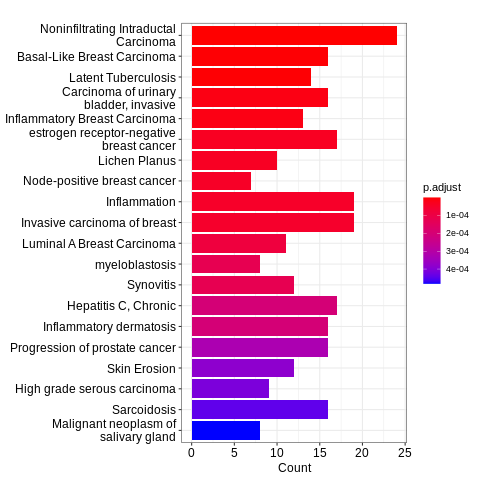

In [ ]:
%%R
# Usaremos el paquete DOSE y unos ejemplos para ilustrar estos gráficos
library (DOSE)
data(geneList)
deGenes <- names(geneList)[abs(geneList) > 2]

edo <- enrichDGN(deGenes)
library(enrichplot)
barplot(edo, showCategory=20)


###5.2. Network de genes y términos funcionales

Los bar plots sólo muestran los términos enriquecidos, pero puede ser útil tener información de anotaciones funcionales y genes asociados a las mismas


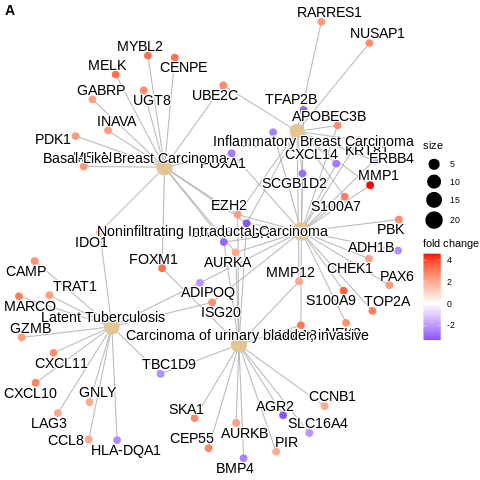

In [ ]:
%%R

## se convierten  gene ID en gene Symbol
edox <- setReadable(edo, 'org.Hs.eg.db', 'ENTREZID')
p1 <- cnetplot(edox, foldChange=geneList)

cowplot::plot_grid(p1, ncol=1, labels=LETTERS[1], rel_widths=c(1.2))


###5.3. Mapas de calor

Estas representaciones, muy útiles para representar datos experimentales (ej. expresión génica) también se puede utiliza para representar los términos y genes. Al igual que las redes, dan información de relación entre genes y términos. Cuando hay muchos términos y genes las redes llegan a ser muy complejas y las visualizaciones no son adecuadas, por lo que la representación en heatmap puede ser más apropiada



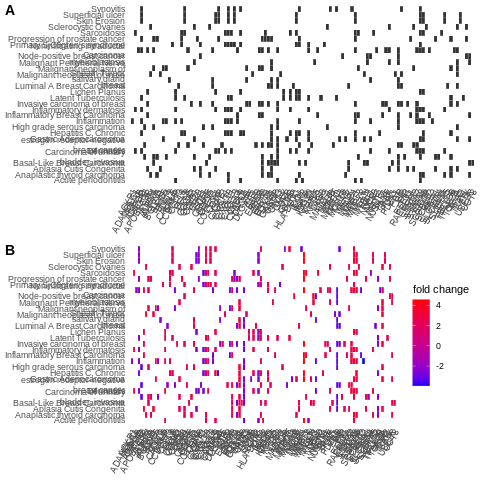

In [ ]:
%%R
p1 <- heatplot(edox)
p2 <- heatplot(edox, foldChange=geneList)
cowplot::plot_grid(p1, p2, ncol=1, labels=LETTERS[1:2])

## **REFERENCIAS**<a id='refs'></a>

* The Gene Ontology Consortium (2019). The Gene Ontology Resource: 20 years and still GOing strong. Nucleic Acids Research, Volume 47
* Huang, D.W., Sherman, B.T., and Lempicki, R.A. (2009). Bioinformatics enrichment tools: paths toward the comprehensive functional analysis of large gene lists. Nucleic Acids Res. 37, 1–13.
* Subramanian, A., Tamayo, P., Mootha, V.K., Mukherjee, S., Ebert, B.L., Gillette, M.A., Paulovich, A., Pomeroy, S.L., Golub, T.R., Lander, E.S., et al. (2005). Gene set enrichment analysis: a knowledge-based approach for interpreting genome-wide expression profiles. Proc. Natl. Acad. Sci. U. S. A. 102, 15545–15550.

<div class="alert alert-block alert-success">

MOOC Machine Learning y Big Data para la Bioinformática (2ª edición)   
http://abierta.ugr.es     
    
</div>    
